# **Loan Default Prediction**

## **Problem Definition**

### **The Context:**

 - For hundreds of years, one of a banks purposes was to allow individuals the ability to borrow money that they currently did not have in order to use it towards things that they needed/wanted (example: house, cars, land, etc). The idea was that the individual would pay back the bank overtime with intertest, which is how banks made money on these loans. However, many individuals with bad financial planning end up having no money to pay off these loans which leads to the bank not getting their money back. Overtime, rules and regualtions have been made in order to help banks determine who they should be giving out loans too. This process quite extensive and is prone to wrong judgment/approval owing to human error or biases.

### **The objective:**

 - The objective is to simplify this extensive loan acceptance process by developing a model that can predict clients who are most likely to default on their loan as well as give insights to the bank as to what the important features are that correlate to someone who might default. This will in turn reduce the number of defaults the bank has and thus save them money and reduce risk.

### **The key questions:**

- What individual features correlate to loan defaults?

- which features have the highest impact to loan defaults?

- Which performance metrics do i want to use in order to valuate the success of the model?

### **The problem formulation**:

- The model needs to predict whether someone will default on their loan or not given various inputs from data gathered by the bank. Also, the model needs to identify important factors that contribute to loan defaulting.

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property.

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts)

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments).

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due).

* **CLAGE:** Age of the oldest credit line in months.

* **NINQ:** Number of recent credit inquiries.

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## **Import the necessary libraries and Data**

In [1]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# Metrics to evaluate the model
from sklearn import metrics
# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    classification_report,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

## **Data Overview**

- Reading the dataset
- Understanding the shape of the dataset
- Checking the data types
- Checking for missing values
- Checking for duplicated values

In [2]:
hm=pd.read_csv("hmeq.csv")

In [3]:
# Copying data to another variable to avoid any changes to original data
bank=hm.copy()

In [4]:
bank.head() ## to view top 5 rows of the data

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.00000,39025.00000,HomeImp,Other,10.50000,0.00000,0.00000,94.36667,1.00000,9.00000,NaN
1,1,1300,70053.00000,68400.00000,HomeImp,Other,7.00000,0.00000,2.00000,121.83333,0.00000,14.00000,NaN
2,1,1500,13500.00000,16700.00000,HomeImp,Other,4.00000,0.00000,0.00000,149.46667,1.00000,10.00000,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.00000,112000.00000,HomeImp,Office,3.00000,0.00000,0.00000,93.33333,0.00000,14.00000,NaN


In [5]:
bank.tail()## to view last 5 rows of the data

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.00000,90185.00000,DebtCon,Other,16.00000,0.00000,0.00000,221.80872,0.00000,16.00000,36.11235
5956,0,89000,54576.00000,92937.00000,DebtCon,Other,16.00000,0.00000,0.00000,208.69207,0.00000,15.00000,35.85997
5957,0,89200,54045.00000,92924.00000,DebtCon,Other,15.00000,0.00000,0.00000,212.27970,0.00000,15.00000,35.55659
5958,0,89800,50370.00000,91861.00000,DebtCon,Other,14.00000,0.00000,0.00000,213.89271,0.00000,16.00000,34.34088
5959,0,89900,48811.00000,88934.00000,DebtCon,Other,15.00000,0.00000,0.00000,219.60100,0.00000,16.00000,34.57152


In [6]:
bank.shape  ## Giving the shape there are 5960 inputs each with 13 features

(5960, 13)

In [7]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [8]:
bank.duplicated().sum() # this shows there are no duplicate values

0

In [9]:
bank.nunique()

BAD           2
LOAN        540
MORTDUE    5053
VALUE      5381
REASON        2
JOB           6
YOJ          99
DEROG        11
DELINQ       14
CLAGE      5314
NINQ         16
CLNO         62
DEBTINC    4693
dtype: int64

In [10]:
bank.DELINQ.unique()

array([ 0.,  2., nan,  1.,  6., 15.,  4.,  3.,  5.,  7.,  8., 10., 12.,
       11., 13.])

In [11]:
bank.DEROG.unique()

array([ 0., nan,  3.,  2.,  1.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [12]:
bank.JOB.unique()

array(['Other', nan, 'Office', 'Sales', 'Mgr', 'ProfExe', 'Self'],
      dtype=object)

In [13]:
bank.isnull().sum() # to count how many null values there are

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [14]:
bank.isnull().sum()/5960*100 # converting to a percentage

BAD        0.00000
LOAN       0.00000
MORTDUE    8.69128
VALUE      1.87919
REASON     4.22819
JOB        4.68121
YOJ        8.64094
DEROG     11.87919
DELINQ     9.73154
CLAGE      5.16779
NINQ       8.55705
CLNO       3.72483
DEBTINC   21.25839
dtype: float64

**Observations:** There is a lot of missing data in this dataset that will have to be addressed before creating the models. The DEBTINC feature has the most with over 21% of the data missing values.

In [15]:
cols = bank.select_dtypes(['object']).columns.tolist()

#adding target variable to this list as this is an classification problem and the target variable is categorical

cols.append('BAD')

In [16]:
cols
for i in cols:
    bank[i] = bank[i].astype('category')

In [17]:
bank.info() #Checking the info again and the datatype of different variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


## Summary Statistics

In [18]:
# Making a list of all categorical variables
cat_col = list(bank.select_dtypes("category").columns)

# Printing % count of each unique value in each column
for column in cat_col:
    print(bank[column].value_counts(normalize=True))
    print("-" * 50)

0   0.80050
1   0.19950
Name: BAD, dtype: float64
--------------------------------------------------
DebtCon   0.68816
HomeImp   0.31184
Name: REASON, dtype: float64
--------------------------------------------------
Other     0.42035
ProfExe   0.22461
Office    0.16687
Mgr       0.13501
Self      0.03397
Sales     0.01919
Name: JOB, dtype: float64
--------------------------------------------------


**Observations:** For the object data types it can be seen that for the reason for the loan over 68% of individuals said it was for debt consolidation while roughly half the individuals declared their job as other.

Only roughly 20% of individuals have defaulted on their loan. Since the data is skewed heavily toward non defaulted, for modeling it may be beneficial to weight the data toward defaulted to help train the model

In [19]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
LOAN,5960.00000,18607.96980,11207.48042,1100.00000,11100.00000,16300.00000,23300.00000,89900.00000
MORTDUE,5442.00000,73760.81720,44457.60946,2063.00000,46276.00000,65019.00000,91488.00000,399550.00000
VALUE,5848.00000,101776.04874,57385.77533,8000.00000,66075.50000,89235.50000,119824.25000,855909.00000
YOJ,5445.00000,8.92227,7.57398,0.00000,3.00000,7.00000,13.00000,41.00000
DEROG,5252.00000,0.25457,0.84605,0.00000,0.00000,0.00000,0.00000,10.00000
DELINQ,5380.00000,0.44944,1.12727,0.00000,0.00000,0.00000,0.00000,15.00000
CLAGE,5652.00000,179.76628,85.81009,0.00000,115.11670,173.46667,231.56228,1168.23356
NINQ,5450.00000,1.18606,1.72867,0.00000,0.00000,1.00000,2.00000,17.00000
CLNO,5738.00000,21.29610,10.13893,0.00000,15.00000,20.00000,26.00000,71.00000
DEBTINC,4693.00000,33.77992,8.60175,0.52450,29.14003,34.81826,39.00314,203.31215


**Observations:** Loan Amount: Average loan amount is 18607 with a median of 16300$

Mortage Due: average is 73760 and median is 65019$

Value of property: average is 101776 with a median of 89235$

Years at present Job: Average is 8.92 years and median is 7

DEROG: Number of major derogatory reports: Average is 0.25 however these are discrete values so the average doesnt mean much. Median is 0

DELINQ: Number of delinquent credit lines: Average is 0.45 also is a discrete value. Median is 0

CLAGE Age of the oldest credit line in months: Average is 179.76 months and median is 173.46 months

NINQ: Number of recent credit inquiries: Average is 1.186 (Discrete variable). Median is 1

CLNO: Number of existing credit lines: Average is 21.29 (Discrete variable). Median is 20 lines of credit

DEBTINC: Debt-to-income ratio: Average is 33.78 while the median is 34.81.

## **Exploratory Data Analysis (EDA) and Visualization**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What is the range of values for the loan amount variable "LOAN"?
2. How does the distribution of years at present job "YOJ" vary across the dataset?
3. How many unique categories are there in the REASON variable?
4. What is the most common category in the JOB variable?
5. Is there a relationship between the REASON variable and the proportion of applicants who defaulted on their loan?
6. Do applicants who default have a significantly different loan amount compared to those who repay their loan?
7. Is there a correlation between the value of the property and the loan default rate?
8. Do applicants who default have a significantly different mortgage amount compared to those who repay their loan?

### **Univariate Analysis for Numerical Values**

In [20]:
float_col = list(bank.select_dtypes("float").columns) # making a list of all float values

In [21]:
num_col = list(bank.select_dtypes("int").columns) # making a list of all number values

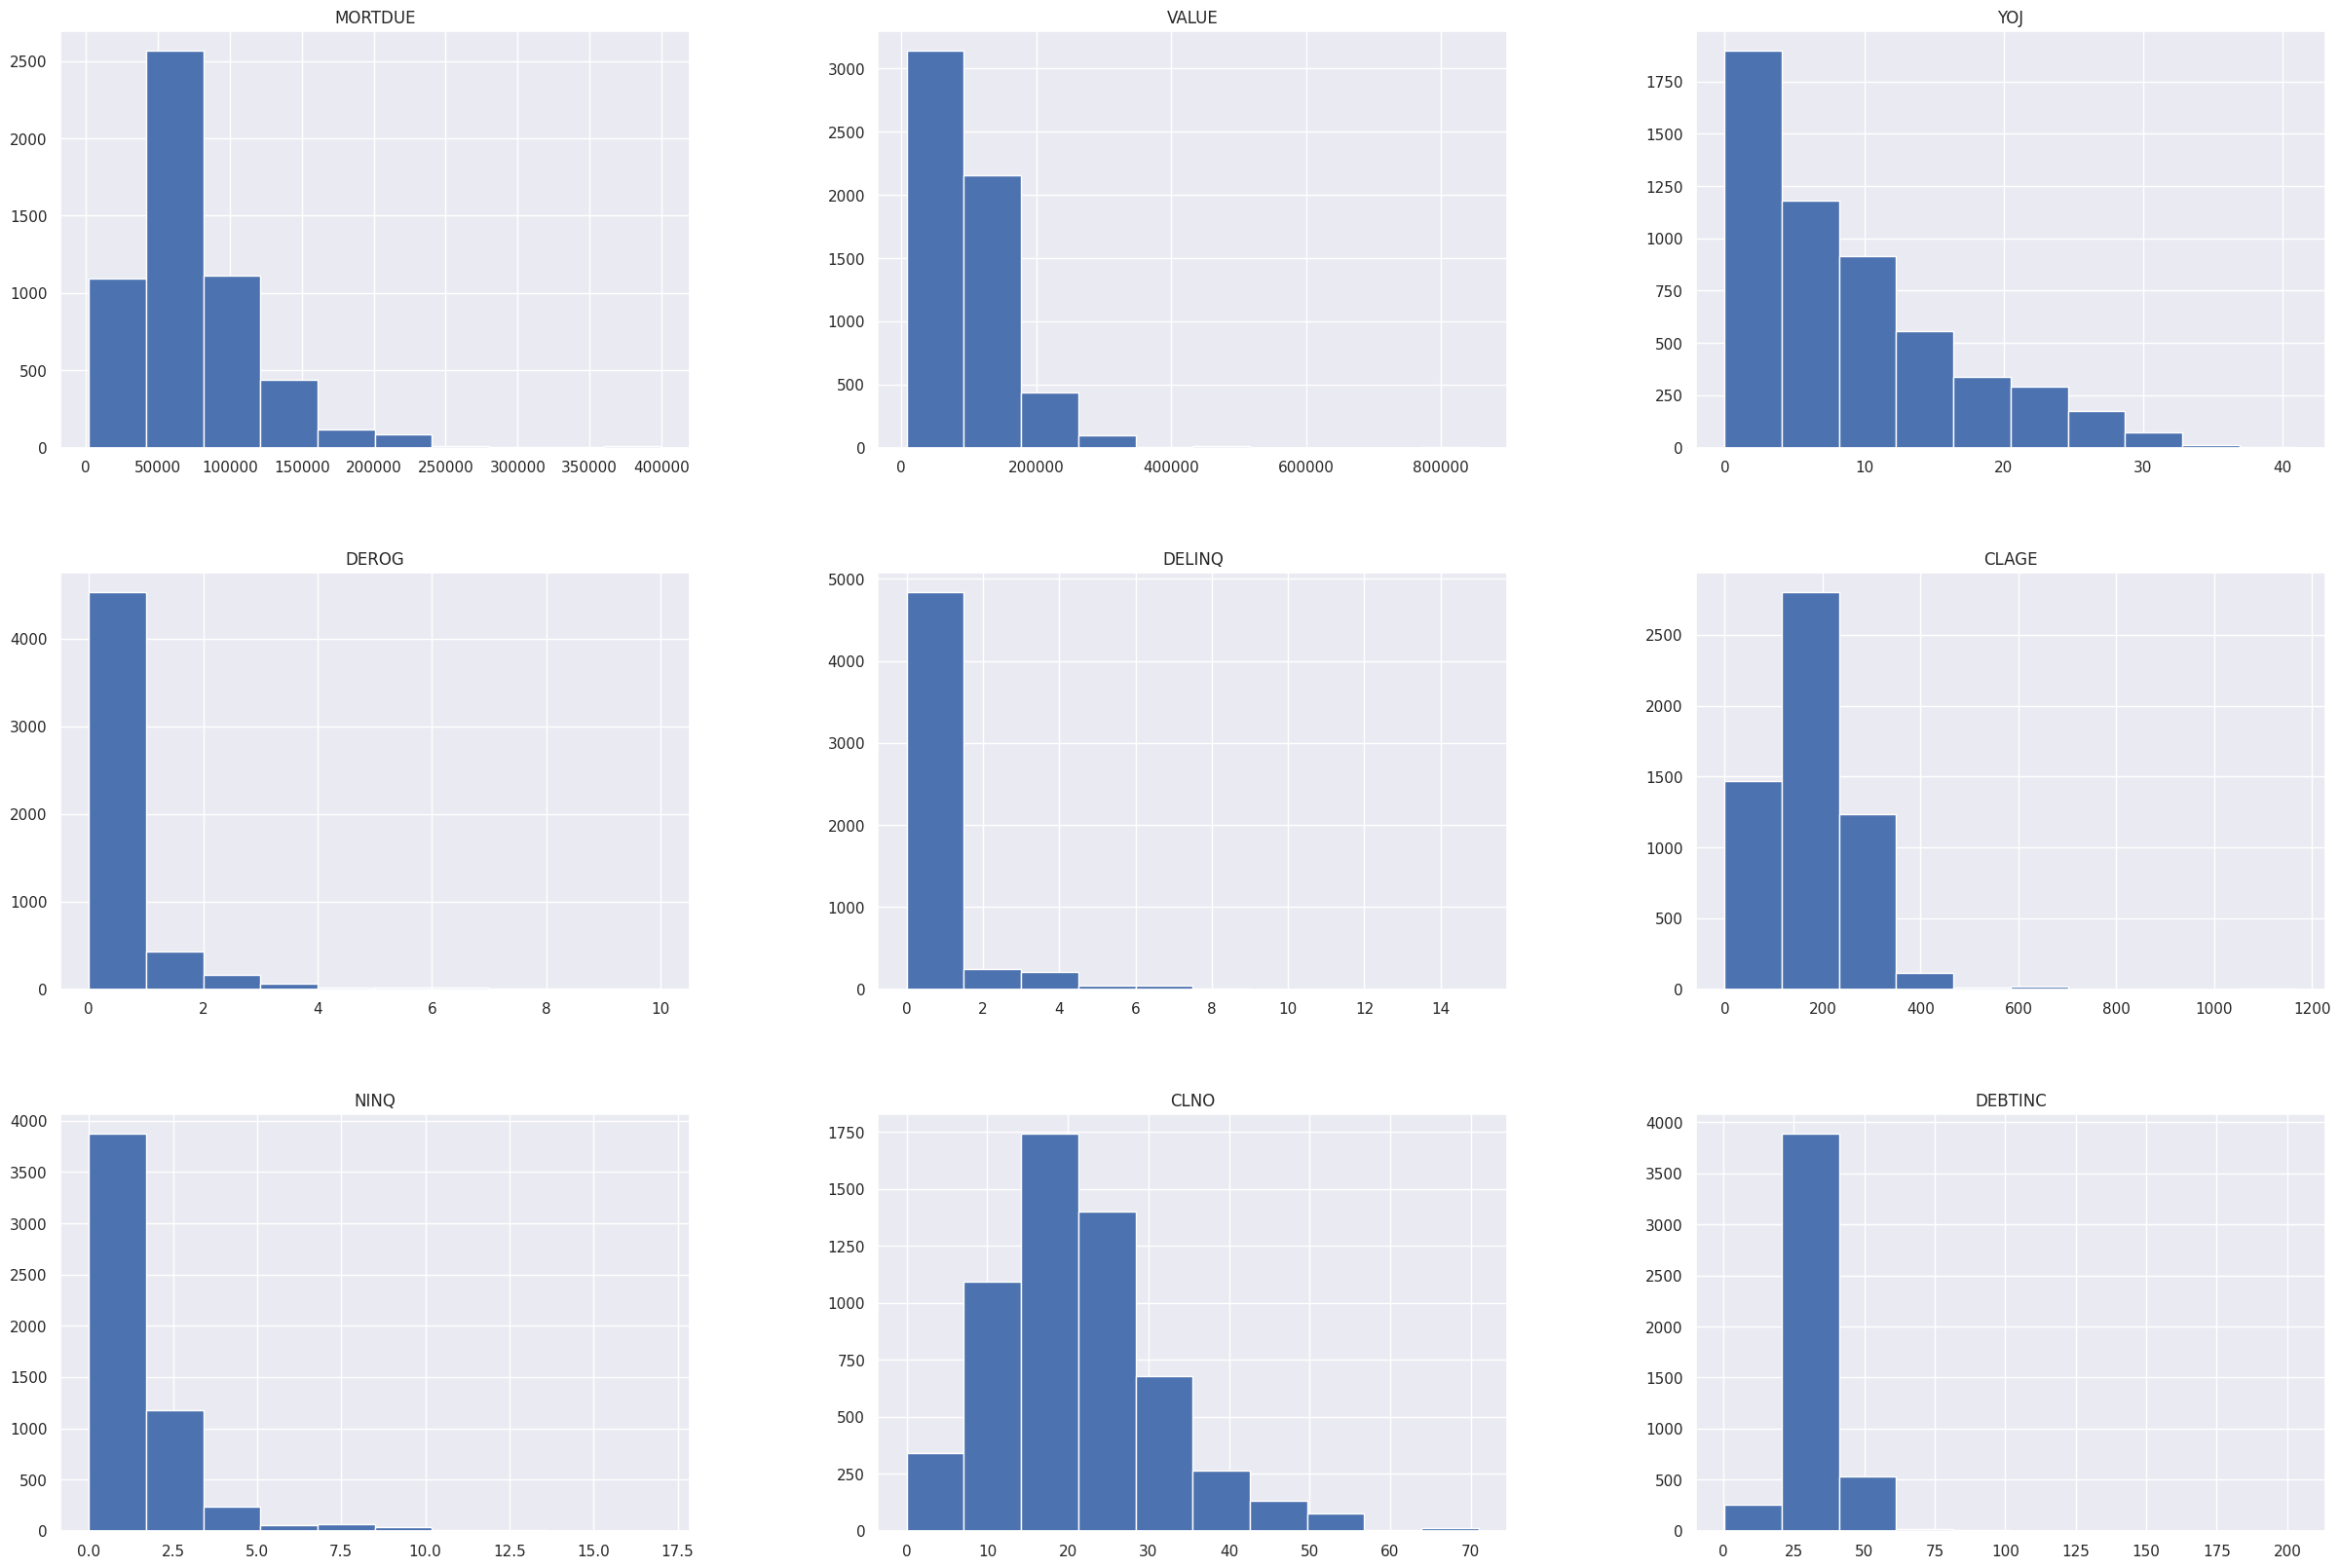

In [22]:
bank[float_col].hist(figsize = (30, 20))
plt.show()

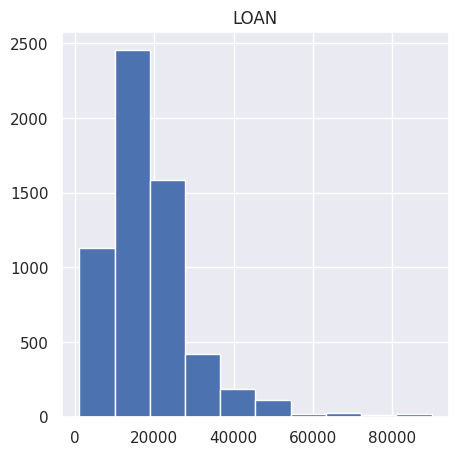

In [23]:
bank[num_col].hist(figsize = (5, 5))
plt.show()

**Observations:** From quick overview of the data it can be seen that most numerical values are right skewed which indicates that majority of individuals tend to have lower values of each of these categories. I will now go more indepth with each variable.

In [24]:
 #Function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(7, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

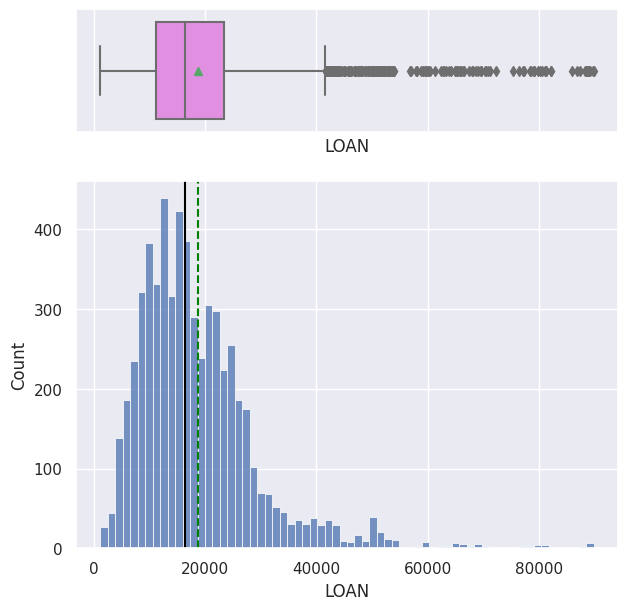

In [25]:
# Build the histogram boxplot for Loan
histogram_boxplot(bank, "LOAN")

**Observations:** Like stated above loan amount is right skewed with the majority falling around the 20,000 range. Also, noticed is that there is a good amount of outliers past 40,000.

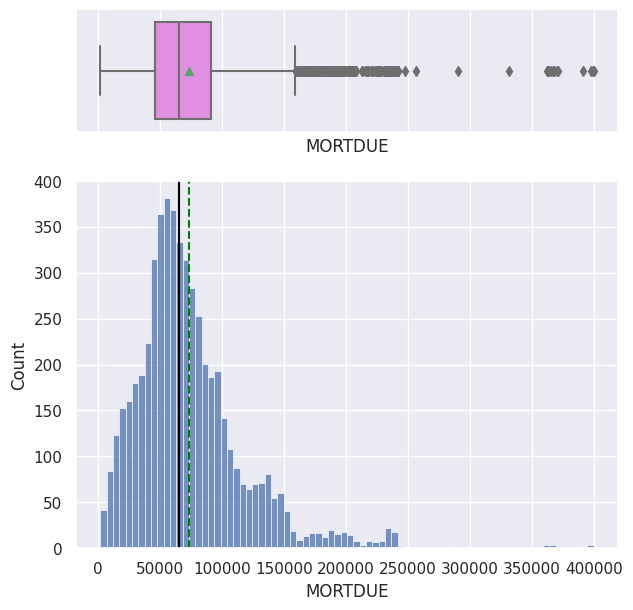

In [26]:
# Build the histogram boxplot for MORTDUE
histogram_boxplot(bank, "MORTDUE")

**Observations:** Mortage due is also right skewed showing that the majority of individuals how lower amounts of morgage due. This makes sense as the loan amounts are also right skewed indicating that people need to take out less money.

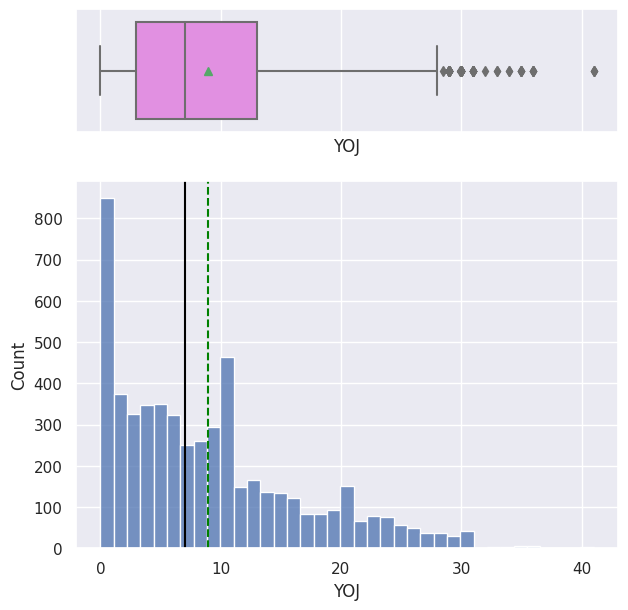

In [27]:
# Build the histogram boxplot for Years at present Job
histogram_boxplot(bank, "YOJ")

**Observations:** Years at current job is also right skewed as individuals tend to be around 1-10 years at their current company. This makes sense as people who are older and therefore have been at their job longer have more money and may not need a loan.

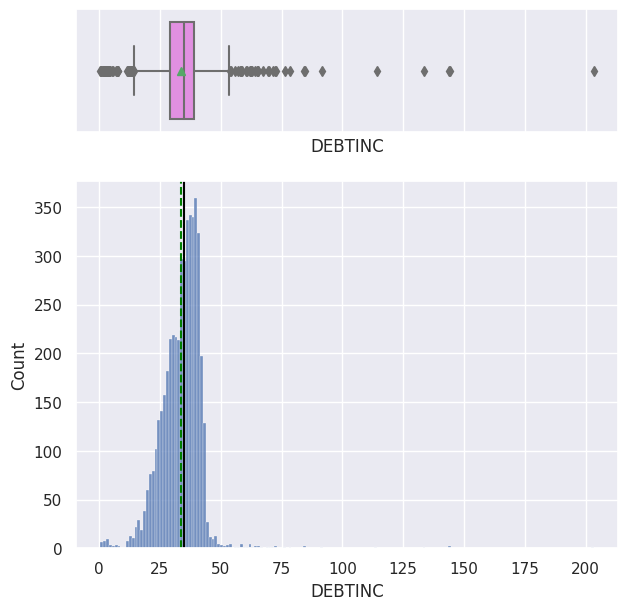

In [28]:
# Build the histogram boxplot for debt to income ratio
histogram_boxplot(bank, "DEBTINC")

**Observations:** Debt to income ratio highly concentraded between 30 to 50 with the median and mean almost being the same.

### **Univariate Analysis - Categorical Data**

In [29]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage

    plt.show() # show the plot

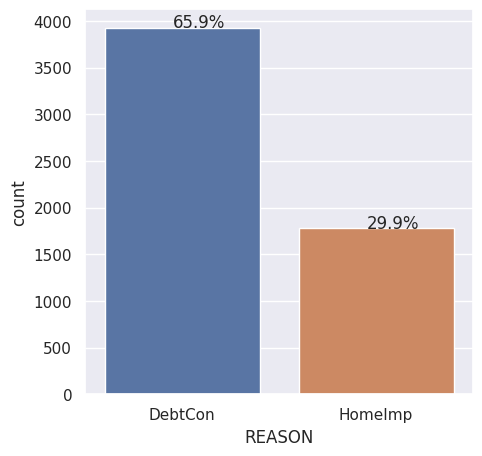

In [30]:
#Build barplot for REASON

plt.figure(figsize=(5,5))
ax = sns.countplot(x=bank["REASON"])
perc_on_bar(ax,bank["REASON"])

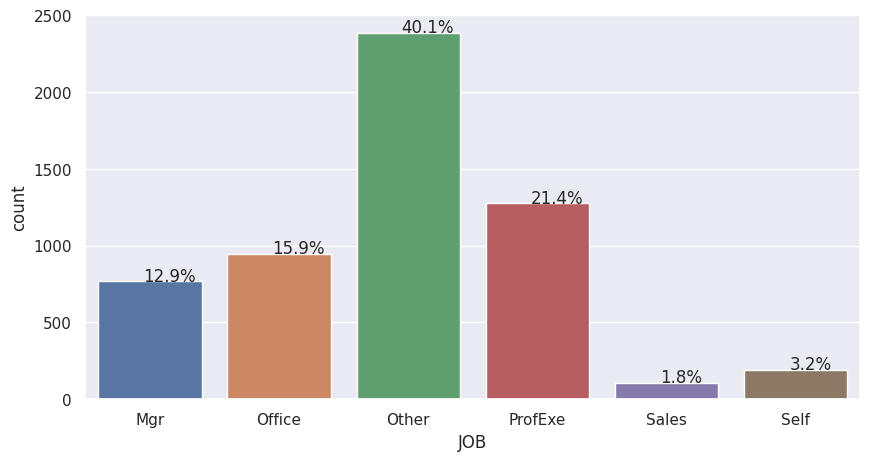

In [31]:
#Build barplot for JOB

plt.figure(figsize=(10,5))
ax = sns.countplot(x=bank["JOB"],)
perc_on_bar(ax,bank["JOB"])

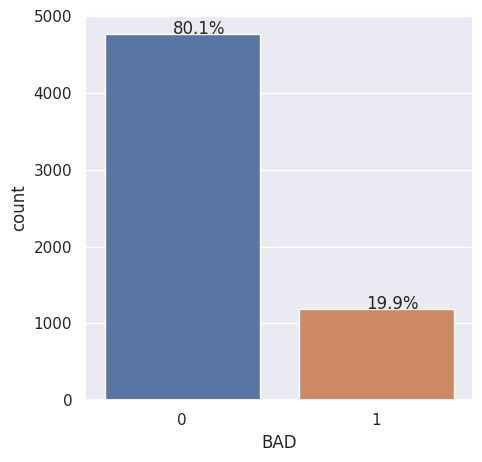

In [32]:
#Build barplot for BAD

plt.figure(figsize=(5,5))
ax = sns.countplot(x=bank["BAD"])
perc_on_bar(ax,bank["BAD"])

**Observations from Categorical variables:** For Reason over 65% of individuals got a loan for debt consolidation, meaning they took out a new loan to pay off other liabilities and consumer debts. The remaining roughly 30% was for home improvement.

For Jobs most individuals put other which really doesnt give us any insight. However the next highest percent job was Profexe and the lowest being sales.

Over 80% of individuals did not default on their loans. That being said we may need to weight the data to focus more on the defaulted individuals.

### **Bivariate Analysis**

In [33]:
### Function to plot distributions
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of BAD for BAD=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of BAD for BAD=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t BAD")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t BAD")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

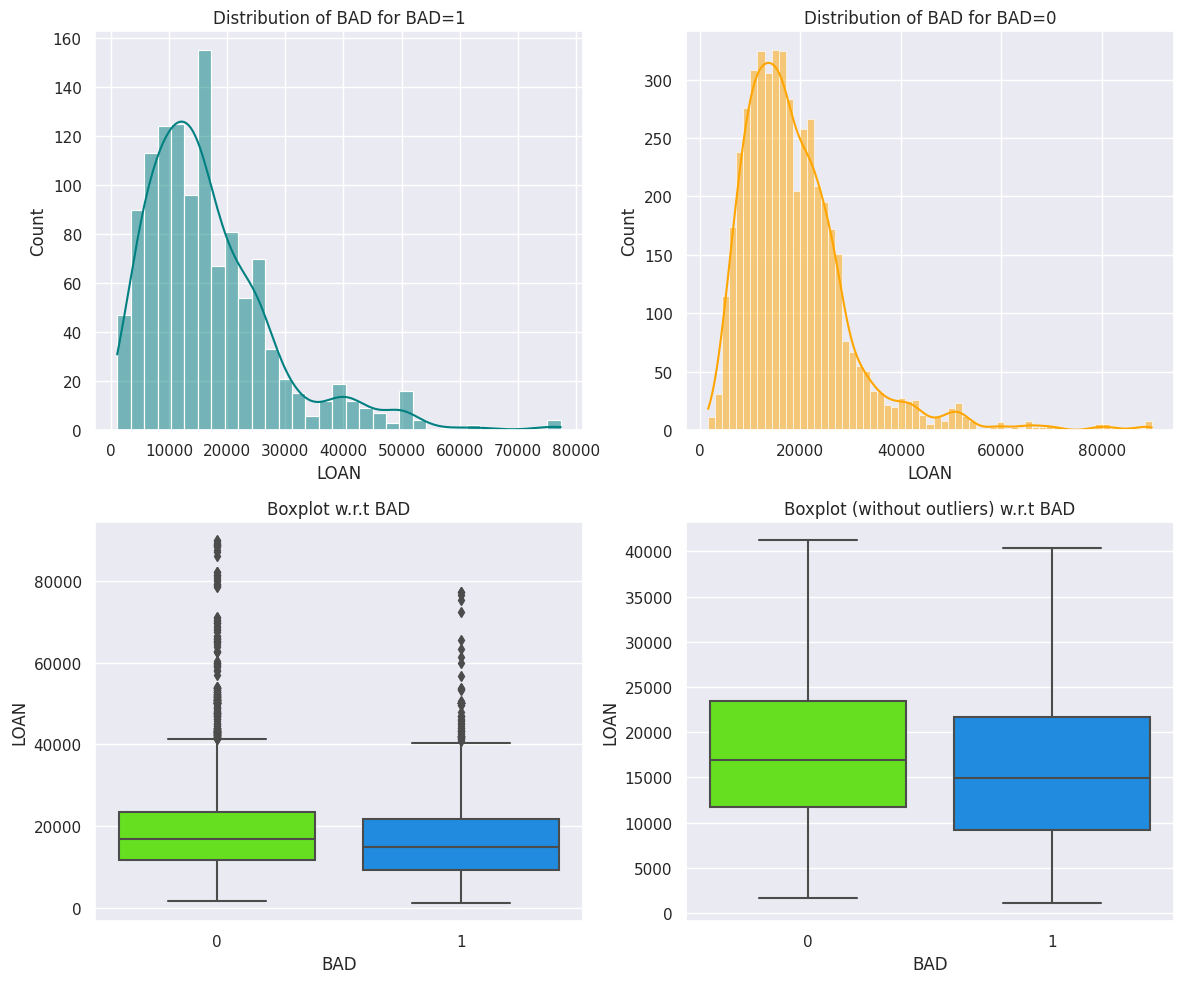

In [34]:
# to make a distribution plot comparing loan amounts to defaulted or not
distribution_plot_wrt_target(bank, "LOAN", "BAD")

**Observations:** The loan amounts for indivduals who defaulted and who did not are very similar. Both groups seem to fall in between the 10,000 to 30,000 range.

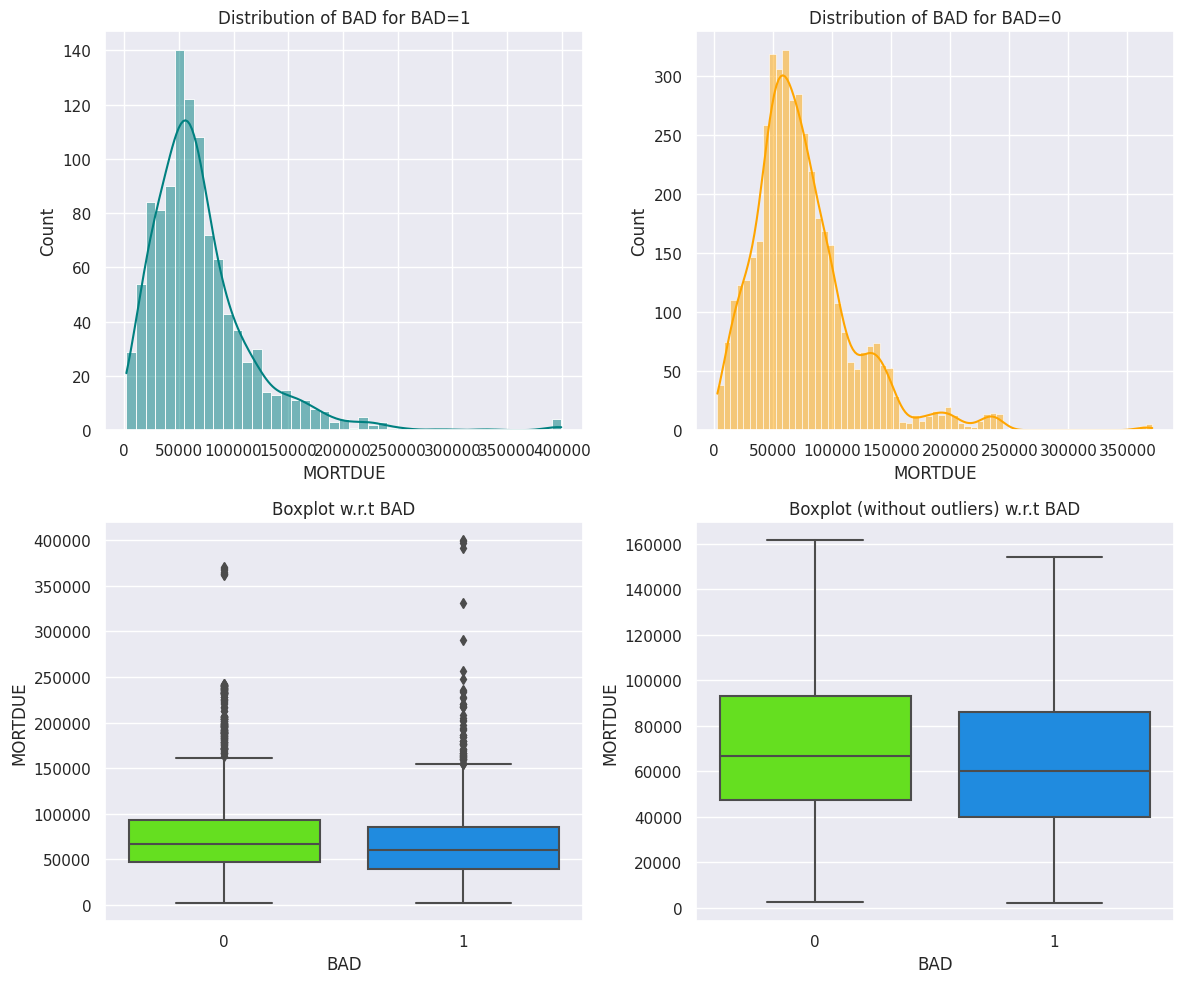

In [35]:
# to make a distribution plot comparing current mortgage due and defaulted or not
distribution_plot_wrt_target(bank, "MORTDUE", "BAD")

**Observations:** The majority of indivduals that both defaulted and who did not, fall between 5,000 to 10,000 dollars when it comes to the amount due on their mortgage

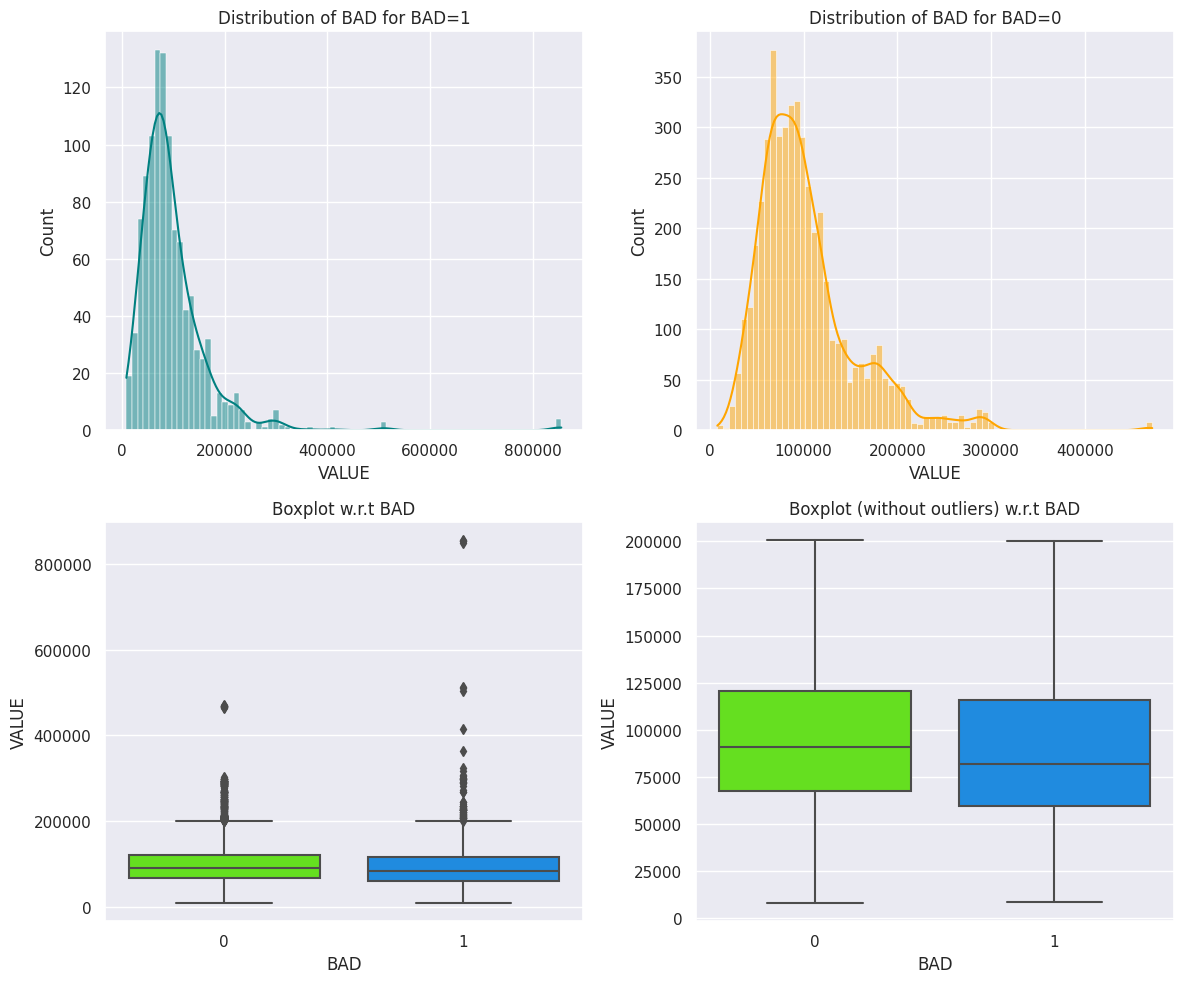

In [36]:
# to make a distribution plot comparing current value of property and defaulted or not
distribution_plot_wrt_target(bank, "VALUE", "BAD")

**Observations:** Similar to the above comparisons the value of the property for both defaulted and non defaulted individuals is very similar ranging between 75000 to 125000 dollars.

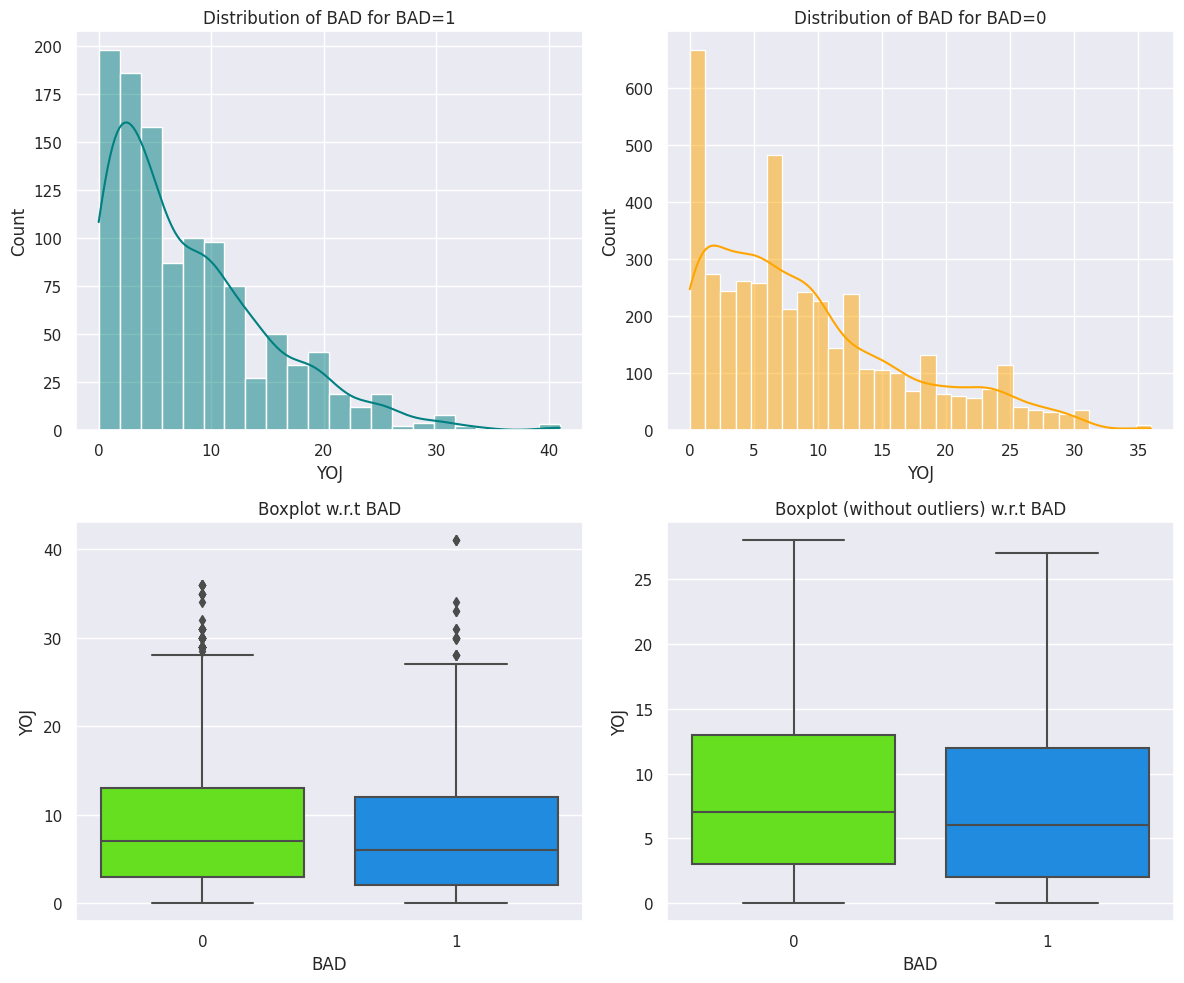

In [37]:
# to make a distribution plot comparing years at job and defaulted or not
distribution_plot_wrt_target(bank, "YOJ", "BAD")

**Observations:** Both defaulted and non defaulted individuals tend to fall under 20 years where the highest concentration is 5 and 15. Individuals who have defaulted tend to be at their job for a shorter amount of time on average but not by much compared to non defaulted.

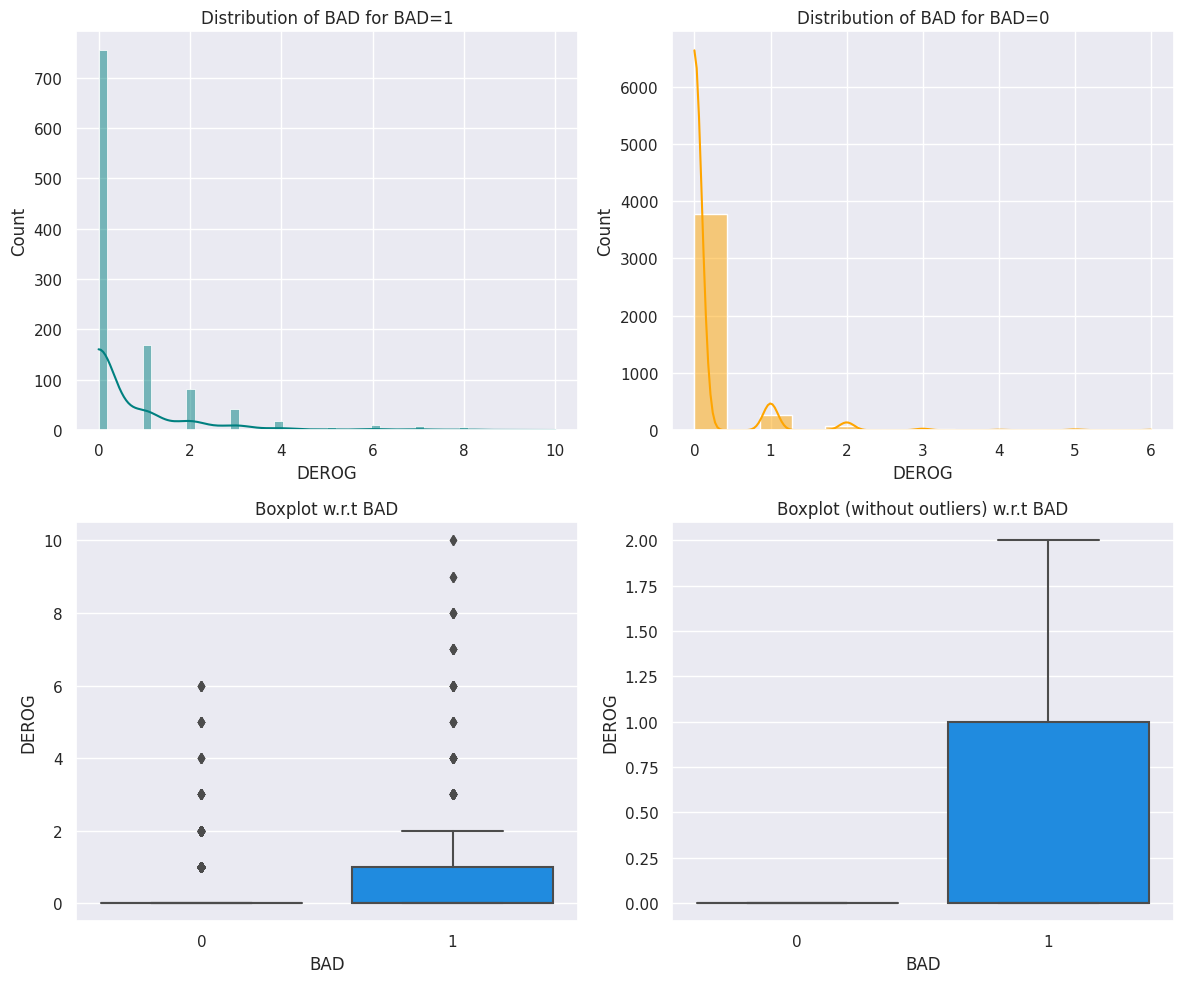

In [38]:
# to make a distribution plot comparing  major derogatory reports and defaulted or not
distribution_plot_wrt_target(bank, "DEROG", "BAD")

**Observations:** Individuals with derogatory reports are more likely to default on their loan then those who do not in comparison to their population

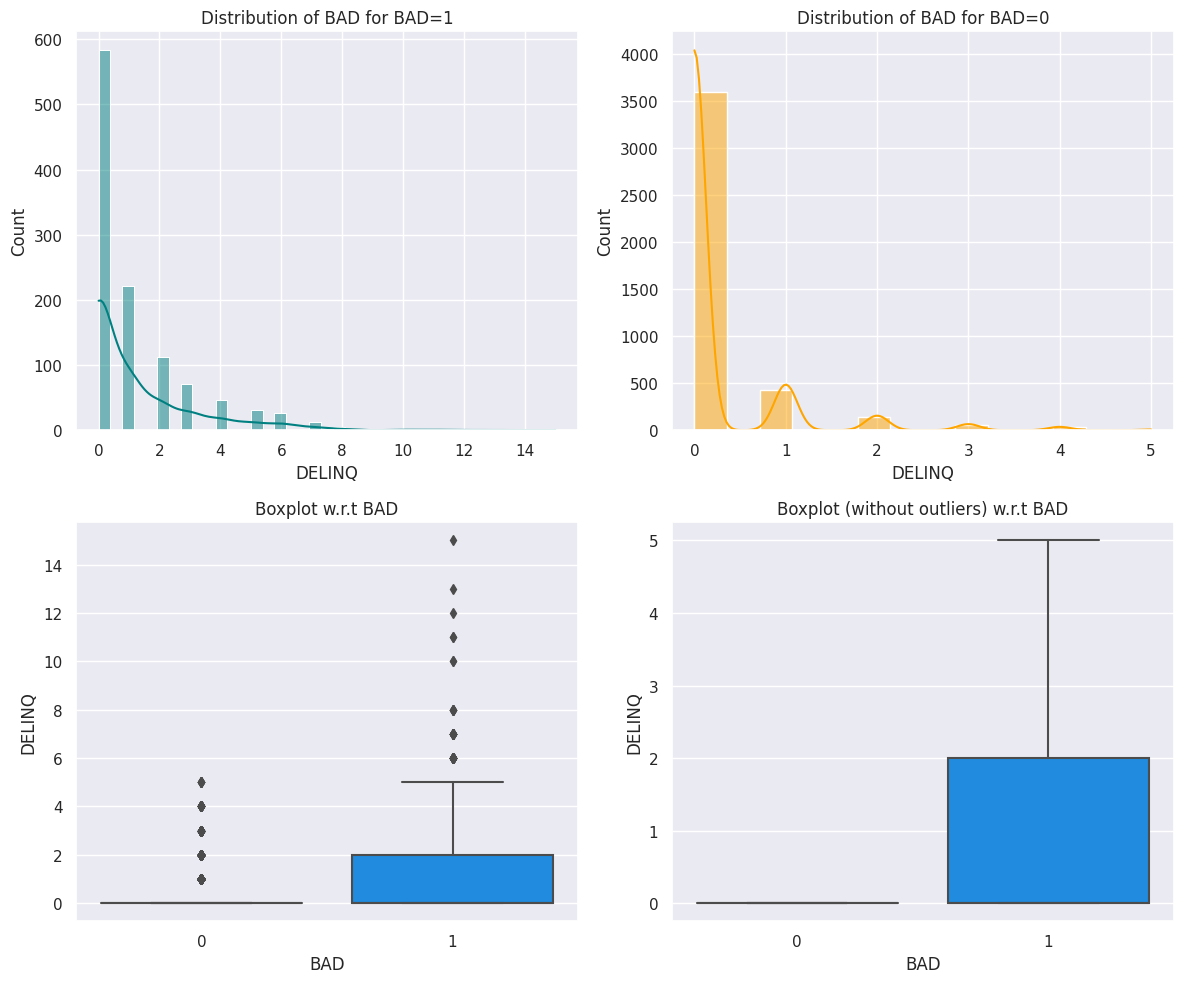

In [39]:
# to make a distribution plot comparing delinquent credit lines and defaulted or not
distribution_plot_wrt_target(bank, "DELINQ", "BAD")

**Observations:** There is alot more individuals with atleast one delinquency percentage wise who defaulted on their loans then the individuals who did not.

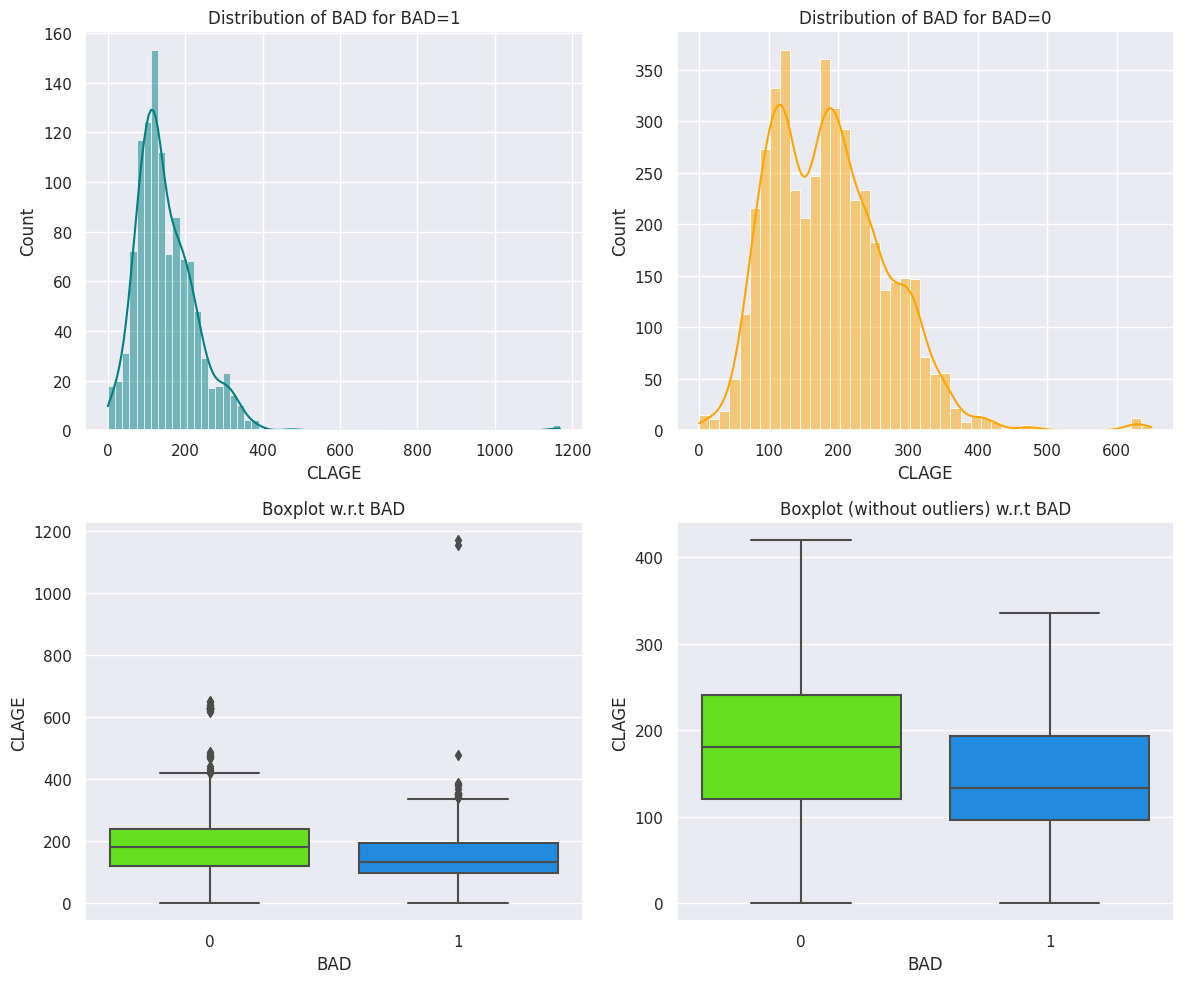

In [40]:
# to make a distribution plot comparing Age of the oldest credit line in months and defaulted or not
distribution_plot_wrt_target(bank, "CLAGE", "BAD")

Observations:** The average oldest credit line for someone who defaulted is slightly lower then one who has not. This make sense as individuals who are capable of paying off their loan slowly overtime would have a longer credit life.

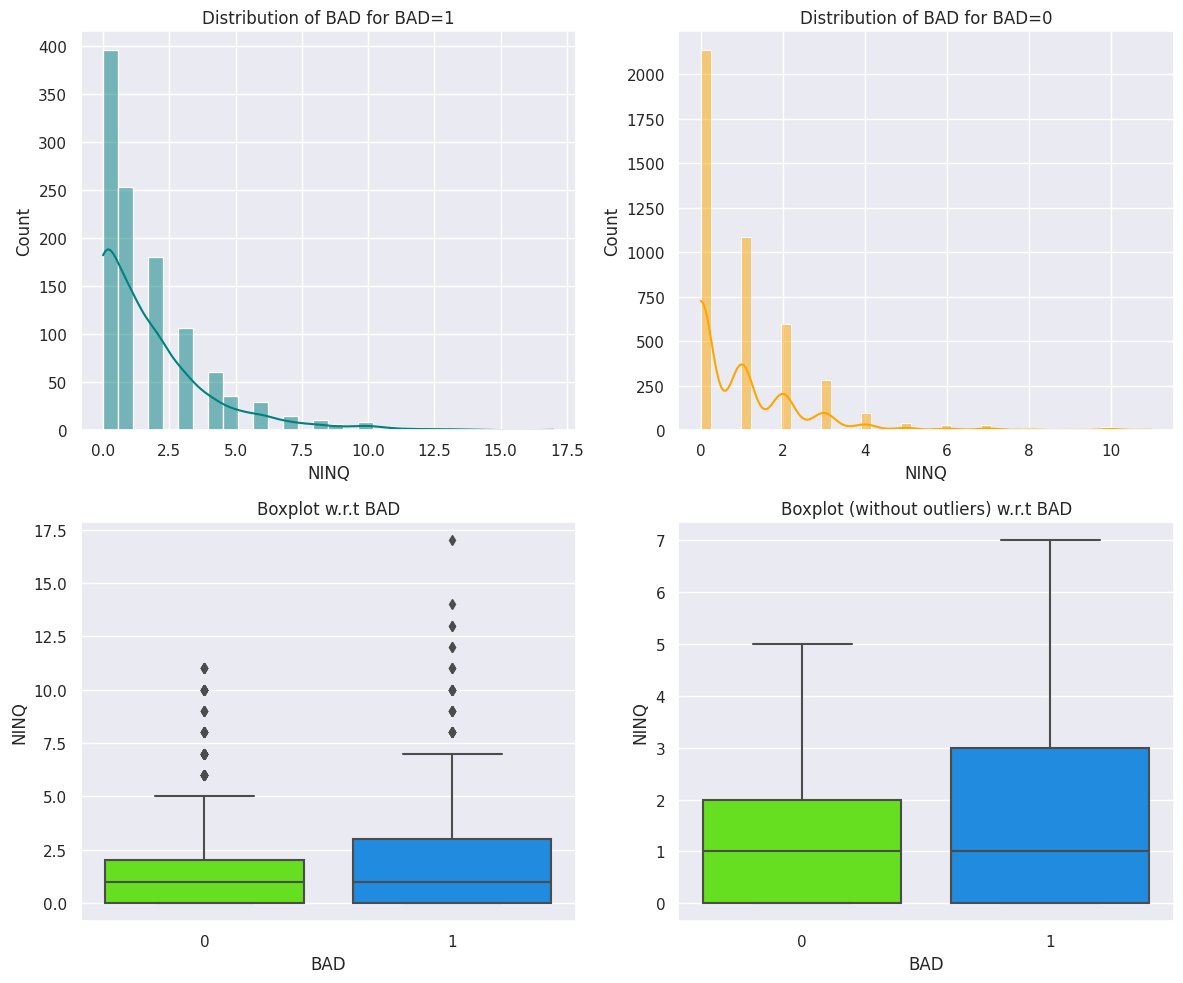

In [41]:
# to make a distribution plot comparing Number of recent credit inquiries and defaulted or not
distribution_plot_wrt_target(bank, "NINQ", "BAD")

Observations:** Individuals who have defaulted on their loan are more likely to have recent credit inquiries. The less likely they are able to get a loan the more inquiries they would need to run.

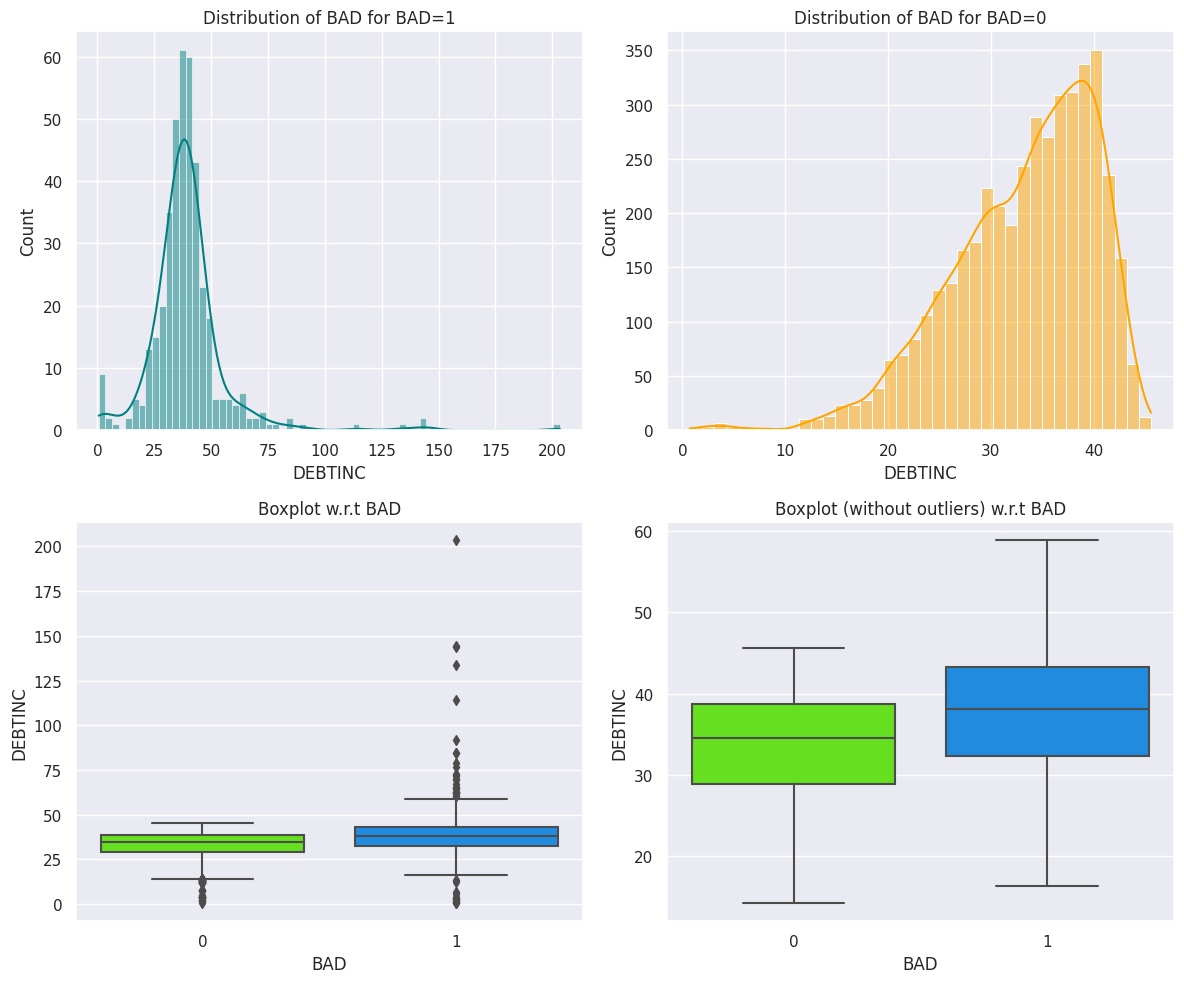

In [42]:
# to make a distribution plot comparing Debt-to-income ratio and defaulted or not
distribution_plot_wrt_target(bank, "DEBTINC", "BAD")

**Observations:** For individuals who have not defaulted on their loans we can see the distribution is left skewed. This is to be expected as banks like to see debt to income ratios below 40% which is rougly what the graph indicates. However, the averages for the both defaulted and non defaulted individuals are pretty similar with defaulted individuals having a higher average. There are many more outliers in the defaulted group of having a much less favorable ratio.

In [43]:
def stacked_barplot(data, predictor, target): ## function to create a stacked bar plot showing the counts of all converted and non converted individuals
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

BAD         0     1   All
REASON                   
All      4567  1141  5708
DebtCon  3183   745  3928
HomeImp  1384   396  1780
------------------------------------------------------------------------------------------------------------------------


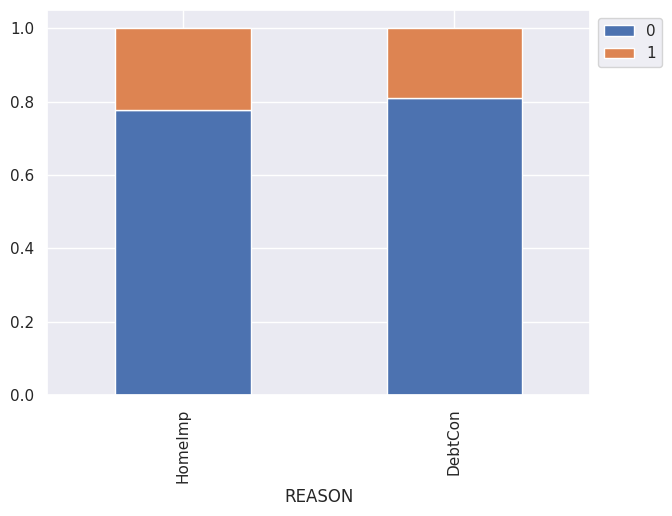

BAD         0     1   All
JOB                      
All      4515  1166  5681
Other    1834   554  2388
ProfExe  1064   212  1276
Mgr       588   179   767
Office    823   125   948
Self      135    58   193
Sales      71    38   109
------------------------------------------------------------------------------------------------------------------------


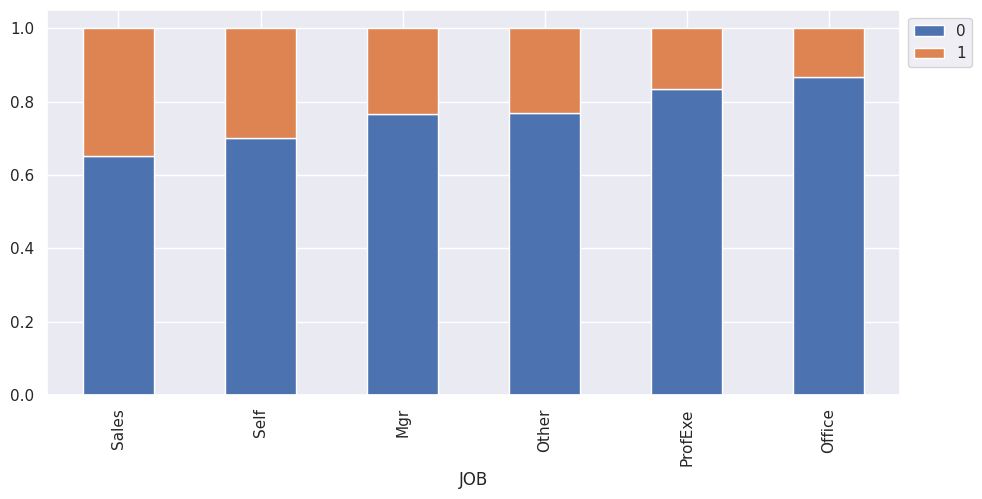

In [44]:
for i in cat_col: ## will print all stackesd bar plots for categorical columns
    if i != 'BAD':
      stacked_barplot(bank, i,"BAD")

**Observations:** For Reason it can be seen that both Debtcon and Home improvement are relatively the same in percentages of individuals who defaulted which is roughly 25%.

Sales jobs has the highest percentage of people who have defaulted while being the which is also the smallest group of people. Next is self employed which is the second smallest group of individuals. Both these groups have around 50% of individuals defaulting. Lowest group of defaulters are people with office jobs with only a 15% default rate.

### **Multivariate Analysis**

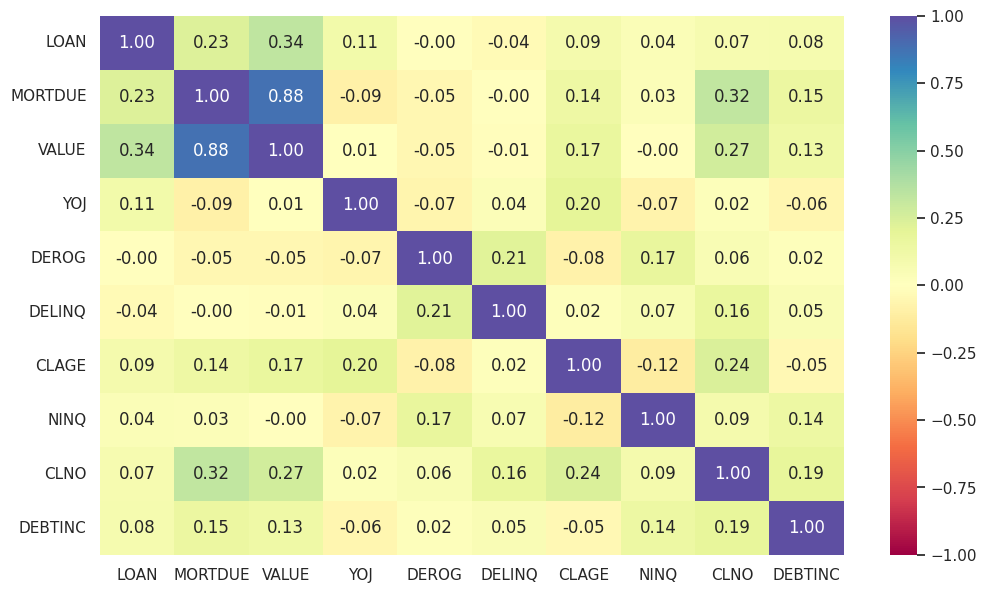

In [45]:
cols_list = bank.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    bank[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

<Axes: xlabel='VALUE', ylabel='MORTDUE'>

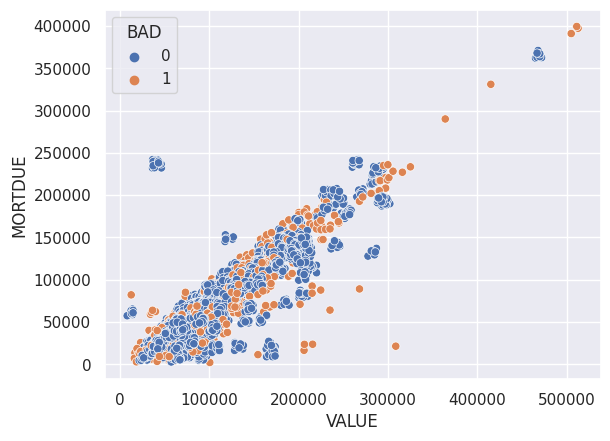

In [46]:
sns.scatterplot(data=bank, x="VALUE",y='MORTDUE', hue="BAD")

**Observations** The one correlation to note is that of the value of the property and the amount due on the mortgage. This would make sense as the mortgage would roughly be the value of the house that you bought it for.Ideally the mortgage would go down as the value of the property goes up which is why alot of data points have a higher value then mortgage.

## Treating Outliers

In [47]:
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''

    Q1=bank["MORTDUE"].quantile(.25) # 25th quantile
    Q3=bank["MORTDUE"].quantile(.75) # 75th quantile
    IQR= Q3 - Q1   # IQR Range
    Lower_Whisker = Q1 - 1.5*IQR  #define lower whisker
    Upper_Whisker = Q3 + 1.5*IQR # define upper Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker
    return df

In [48]:
def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)

    return df


In [49]:
df_bank = bank.copy()



For the first pass of running the models I decided to not get rid of the outliers as decision trees and random forest models are normally not affected by outliers. The above function will treat outliers if later I do so decide to treat them.

## Treating Missing Values

In [50]:
#Treat Missing values in numerical columns with median and mode in categorical variables
#Treating Categorical variables first with mode
df_bank = df_bank.apply(lambda x: x.fillna(x.value_counts().index[0]))
#Treating numerical values with median
df_bank.fillna(df_bank.median(), inplace=True)

In [51]:
df_bank.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

**Observations** We can see the missing values have been treated as there is no more null values.

In [52]:
df_bank.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.00000,39025.00000,HomeImp,Other,10.50000,0.00000,0.00000,94.36667,1.00000,9.00000,37.11361
1,1,1300,70053.00000,68400.00000,HomeImp,Other,7.00000,0.00000,2.00000,121.83333,0.00000,14.00000,37.11361
2,1,1500,13500.00000,16700.00000,HomeImp,Other,4.00000,0.00000,0.00000,149.46667,1.00000,10.00000,37.11361
3,1,1500,42000.00000,60000.00000,DebtCon,Other,0.00000,0.00000,0.00000,102.50000,0.00000,16.00000,37.11361
4,0,1700,97800.00000,112000.00000,HomeImp,Office,3.00000,0.00000,0.00000,93.33333,0.00000,14.00000,37.11361


## **Important Insights from EDA**

What are the the most important observations and insights from the data based on the EDA performed?

## **Model Building - Approach**
- Data preparation
- Partition the data into train and test set
- Build the model
- Fit on the train data
- Tune the model
- Test the model on test set

### Creating Dummy variables for categorical columns

In [53]:
# Creating a list of columns for which we will create dummy variables
to_get_dummies_for = ['REASON',"JOB"]

In [54]:
# Creating dummy variables
bank_Dummy = pd.get_dummies(data = df_bank, columns = to_get_dummies_for, drop_first = True)

In [55]:
bank_Dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1100,25860.00000,39025.00000,10.50000,0.00000,0.00000,94.36667,1.00000,9.00000,37.11361,1,0,1,0,0,0
1,1,1300,70053.00000,68400.00000,7.00000,0.00000,2.00000,121.83333,0.00000,14.00000,37.11361,1,0,1,0,0,0
2,1,1500,13500.00000,16700.00000,4.00000,0.00000,0.00000,149.46667,1.00000,10.00000,37.11361,1,0,1,0,0,0
3,1,1500,42000.00000,60000.00000,0.00000,0.00000,0.00000,102.50000,0.00000,16.00000,37.11361,0,0,1,0,0,0
4,0,1700,97800.00000,112000.00000,3.00000,0.00000,0.00000,93.33333,0.00000,14.00000,37.11361,1,1,0,0,0,0


In [56]:
# Separating the target variable and other variables

Y = bank_Dummy.BAD

X = bank_Dummy.drop(['BAD'], axis = 1)

### Splitting the data into 70% train and 30% test

In [57]:
# Splitting the data into a 70:30 ratio for train to test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

In [58]:
# to validate and show the size of the train and test data sets
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (4172, 16)
Shape of test set :  (1788, 16)
Percentage of classes in training set:
0   0.80058
1   0.19942
Name: BAD, dtype: float64
Percentage of classes in test set:
0   0.80034
1   0.19966
Name: BAD, dtype: float64


 For both the test and training datasets it appears that individuals who did not default are much higher then those who did. I will probably weight the values to focus more on defaulted individuals.

### Logistic Regression

To Begin this process I will create a function to calculate and print the classification report and confusion matrix so that I don't have to rewrite the same code repeatedly for each model

In [59]:
# Creating metric function

def metrics_score(actual, predicted):

    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Not Defaulted', 'Defaulted'], yticklabels = ['Not Defaulted', 'Defaulted'])
    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

In [60]:
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier

    predictors: independent variables

    target: dependent variable
    """

    # Predicting using the independent variables
    pred = model.predict(predictors)

    recall = recall_score(target, pred,average = 'macro')                 # To compute recall

    precision = precision_score(target, pred, average = 'macro')              # To compute precision

    acc = accuracy_score(target, pred)                                 # To compute accuracy score


    # Creating a dataframe of metrics

    df_perf = pd.DataFrame(
        {
            "Precision":  precision,
            "Recall":  recall,
            "Accuracy": acc,
        },
        index = [0],
    )

    return df_perf

I will use the class_weight hyperparameter with the value equal to {0: 0.2, 1: 0.8} which is approximately the opposite of the imbalance in the original data.

This would tell the model that 1 is the important class here.

In [61]:
lg = LogisticRegression(class_weight={0: 0.2, 1: 0.8},)

In [62]:
lg.fit(x_train,y_train)

LogisticRegression(class_weight={0: 0.2, 1: 0.8})

              precision    recall  f1-score   support

           0       0.89      0.59      0.71      3340
           1       0.30      0.72      0.42       832

    accuracy                           0.61      4172
   macro avg       0.60      0.65      0.56      4172
weighted avg       0.77      0.61      0.65      4172



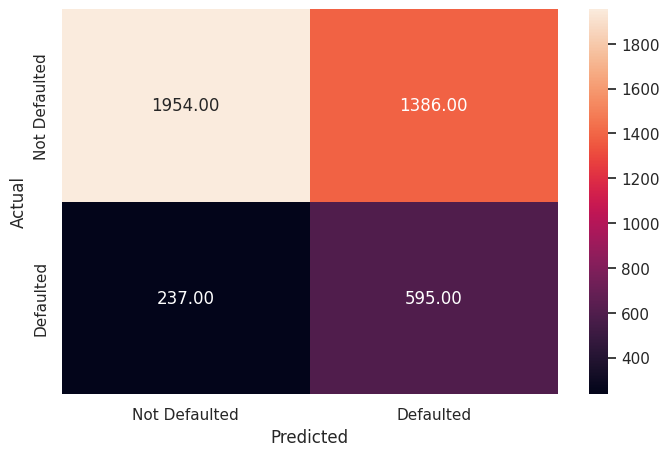

In [63]:
y_train_pred_dt = lg.predict(x_train)

metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.88      0.58      0.70      1431
           1       0.29      0.69      0.41       357

    accuracy                           0.60      1788
   macro avg       0.58      0.63      0.55      1788
weighted avg       0.76      0.60      0.64      1788



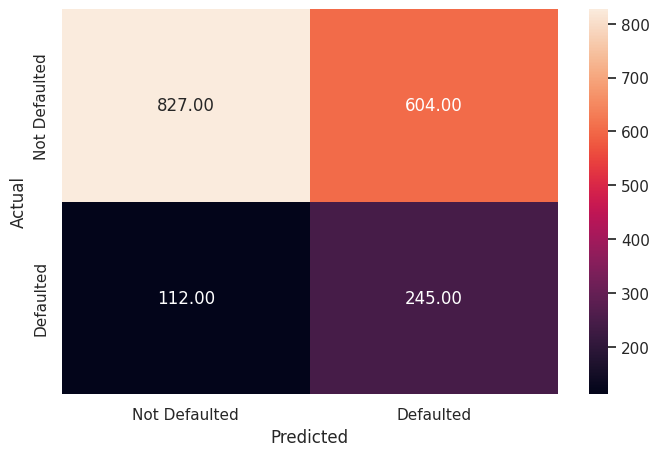

In [64]:
# Checking performance on the test dataset
y_test_pred_dt = lg.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

In [65]:
lg_model_Test = model_performance_classification(lg,x_test,y_test)
lg_model_Test

,Precision,Recall,Accuracy
0,0.58465,0.63210,0.59955


**Observations** The overall accuracy for the model is roughly 60% with a recall of 63%. However, when it comes to classifying defaulting individuals it did slightly better with a recall of 69%. Since predicting who will default is the main goal, we need to maximize our recall for individuals who will default (BAD = 1). However our precision for class1 is pretty low. Lets try and find a threshold that balances these out.

Checking the coefficients to find which variables are leading to defaulting and which can help to reduce defaults.

In [66]:
# Printing the coefficients of logistic regression
cols = X.columns

coef_lg = lg.coef_

pd.DataFrame(coef_lg,columns = cols).T.sort_values(by = 0, ascending = False)

,0
DEBTINC,0.04052
CLNO,0.01283
DELINQ,0.00523
NINQ,0.00378
DEROG,0.00303
YOJ,0.00196
JOB_Other,0.00046
REASON_HomeImp,0.00045
JOB_Self,0.00010
JOB_Sales,0.00009


**Observations** Features which positively affect default rate are: DEBTINC,  CLNO, DELINQ, NINQ, DEROG, YOJ, JOB_Other, REASON_HomeImp, JOB_Sales, JOB_Self

Features which negatively affect default rate are: CLAGE, JOB_ProfExe, JOB_Office, LOAN,

VALUE and MORTDUE appear to have no impact to the default rate.

The Precision-Recall Curve for Logistic Regression to see if a different threshold should be used.

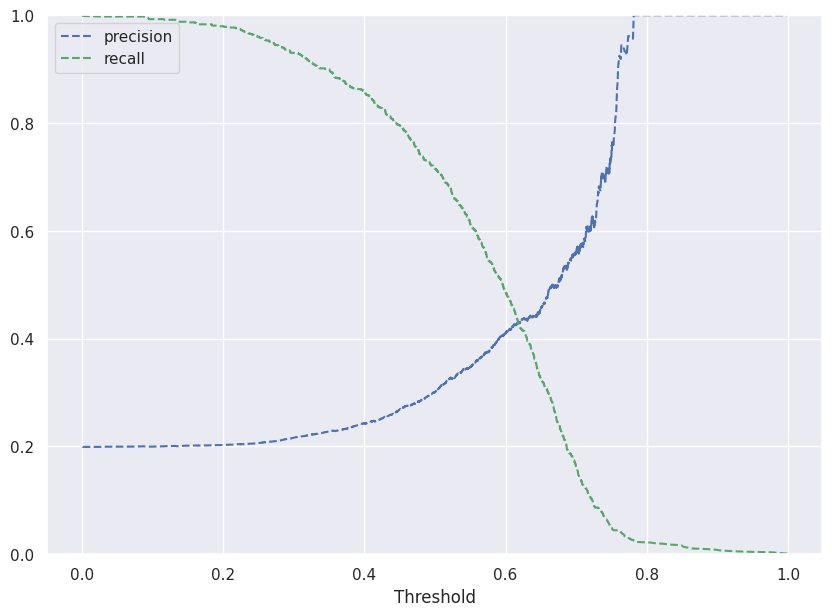

In [67]:
y_scores_lg = lg.predict_proba(x_train) # predict_proba gives the probability of each observation belonging to each class


precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:, 1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize = (10, 7))

plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label = 'precision')

plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')

plt.xlabel('Threshold')

plt.legend(loc = 'upper left')

plt.ylim([0, 1])

plt.show()

**Observations** By the graph the balance of precision and recall appear to be balanced at a threshold of about 0.6-0.63. This is what the default threshold is for the above model. I will set the threshold and re-train the model.

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      3340
           1       0.42      0.46      0.44       832

    accuracy                           0.77      4172
   macro avg       0.64      0.65      0.65      4172
weighted avg       0.77      0.77      0.77      4172



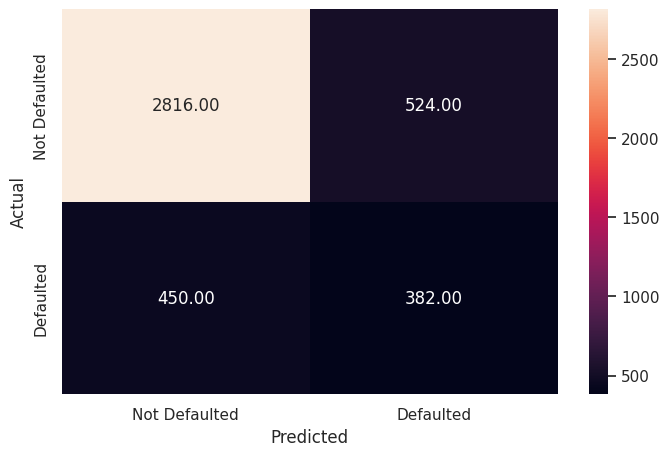

In [68]:
optimal_threshold1 = .61

y_pred_train = lg.predict_proba(x_train)

metrics_score(y_train, y_pred_train[:, 1] > optimal_threshold1)

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1431
           1       0.41      0.47      0.44       357

    accuracy                           0.76      1788
   macro avg       0.64      0.65      0.64      1788
weighted avg       0.77      0.76      0.77      1788



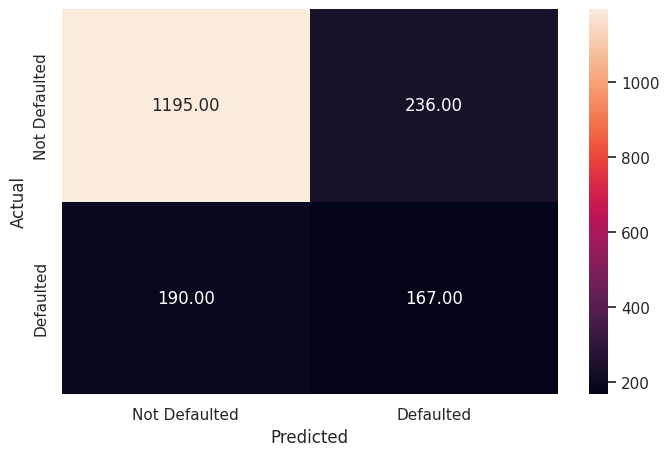

In [69]:
optimal_threshold1 = .61

y_pred_test = lg.predict_proba(x_test)

metrics_score(y_test, y_pred_test[:, 1] > optimal_threshold1)

**Observations:** Once the threshold was changed you can see that recall and precision hsa been more balanced out. This decreased our Recall for class 1 from 68% to 47%. The overall accuracy of the model has increased to 76% compared to the previous model of 61%. However, this will not do a good job at predicting who will default on their loans as that is the main goal fo the bank. I am going to now make the other models to see if we can get a better recall while maintaining a relativiley good precision value as well.

### Decision Tree

In [70]:
# Fitting the decision tree classifier on the training data
d_tree = DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8},)

d_tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8})

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



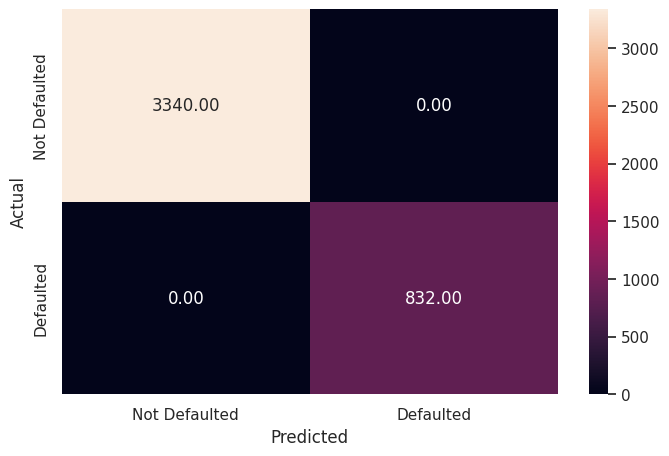

In [71]:
# Checking performance on the training dataset
y_train_pred_dt = d_tree.predict(x_train)

metrics_score(y_train, y_train_pred_dt)

**Observations:** The Decision tree is giving a 100% score for all metrics on the training dataset

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1431
           1       0.71      0.60      0.65       357

    accuracy                           0.87      1788
   macro avg       0.81      0.77      0.79      1788
weighted avg       0.87      0.87      0.87      1788



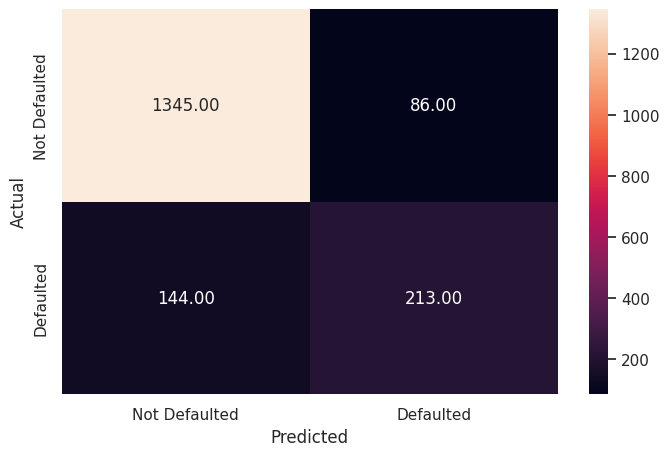

In [72]:
# Checking performance on the test dataset
y_test_pred_dt = d_tree.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

In [73]:
d_tree_test = model_performance_classification(d_tree,x_test,y_test)
d_tree_test

,Precision,Recall,Accuracy
0,0.80783,0.76827,0.87136


**Observations** Right out the gate the overall accuracy of the model is much higher then logistics regression with a 87% accuracy. However, our recall for class 1 is only 59%. It can also be seen that the training model was overfitting the data as the difference between the training performance and test performance are quite different.

### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.**
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth**

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


In [74]:
# Choose the type of classifier
dtree_estimator = DecisionTreeClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 50, 75]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(dtree_estimator, parameters, scoring = scorer, cv = 10)

# Fitting the grid search on the train data
gridCV = gridCV.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
dtree_estimator = gridCV.best_estimator_

# Fit the best estimator to the data
dtree_estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=5,
                       min_samples_leaf=10, random_state=1)

**Observations:** From the grid search results it can be seen that a max tree depth of 5 with min leaf sample of 10 is the ideal combination.

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      3340
           1       0.59      0.85      0.70       832

    accuracy                           0.85      4172
   macro avg       0.77      0.85      0.80      4172
weighted avg       0.89      0.85      0.86      4172



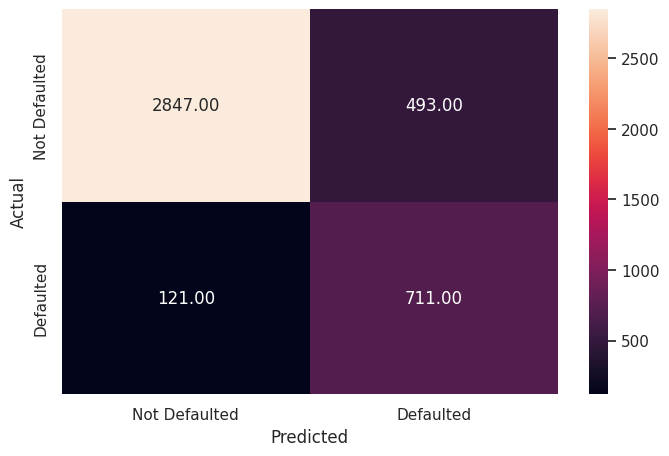

In [75]:
# Checking performance on the training dataset with hyper parameters
y_train_pred_est = dtree_estimator.predict(x_train)

metrics_score(y_train, y_train_pred_est)

**Observations:** From the output you can see that the performance on the training data has gone down. This is okay as we are trying to reduce overfitting

              precision    recall  f1-score   support

           0       0.94      0.85      0.89      1431
           1       0.56      0.78      0.65       357

    accuracy                           0.83      1788
   macro avg       0.75      0.81      0.77      1788
weighted avg       0.86      0.83      0.84      1788



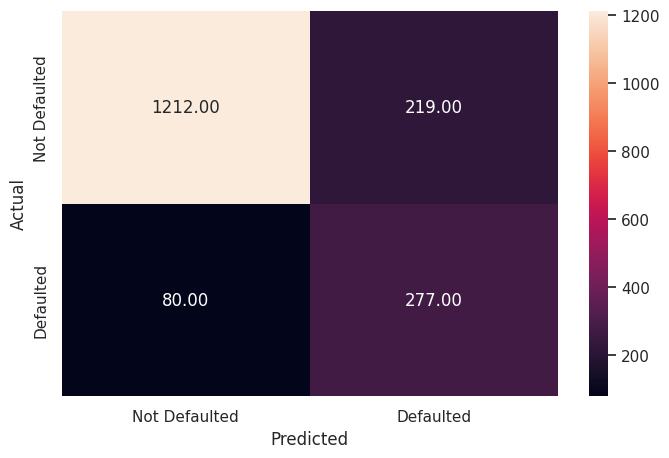

In [76]:
# Checking performance on the test dataset with hyperparameters
y_test_pred_est = dtree_estimator.predict(x_test)

metrics_score(y_test, y_test_pred_est)

In [77]:
dtree_estimator_test = model_performance_classification(dtree_estimator,x_test,y_test)
dtree_estimator_test

,Precision,Recall,Accuracy
0,0.74827,0.81144,0.83277


**Observations:** The overal accuracy has gone down slightly to 83% however overall recall as well as our class 1 recall has increased. With a class 1 recall of 78% that is currently the highest percentage of correct classification. I'll now break the tree down to see which features are of most importance.

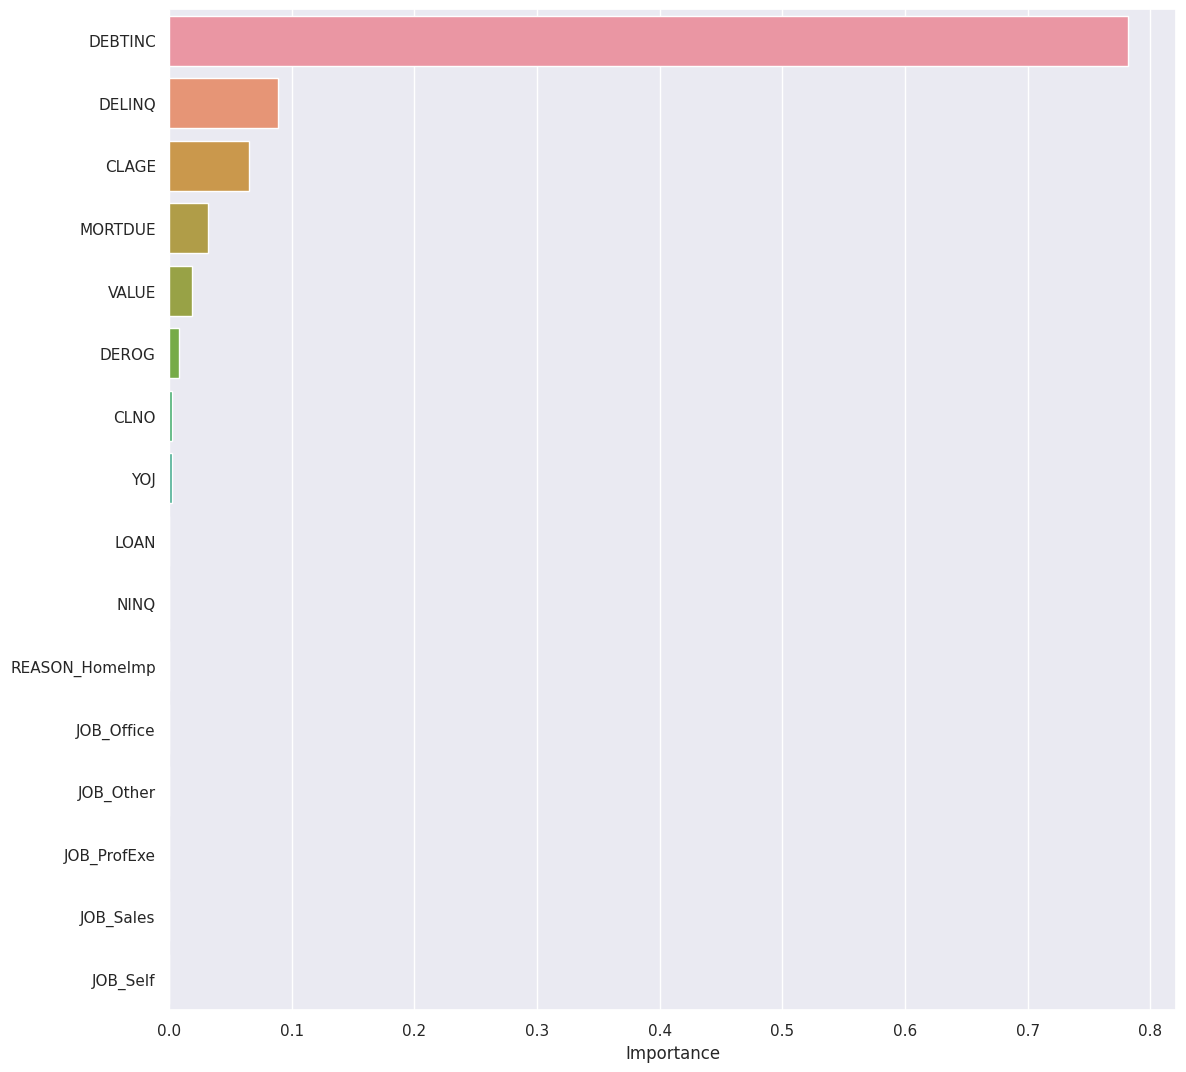

In [78]:
importances = dtree_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x=importance_df.Importance, y=importance_df.index);

**Observations:** It can be seen that Debt to income ratio trumps all other features when it comes to importance. This makes sense as this is what banks use as a measurement to determine is someone would be able to pay back a loan or not. Some other notable features would be DELINQ and CLAGE.

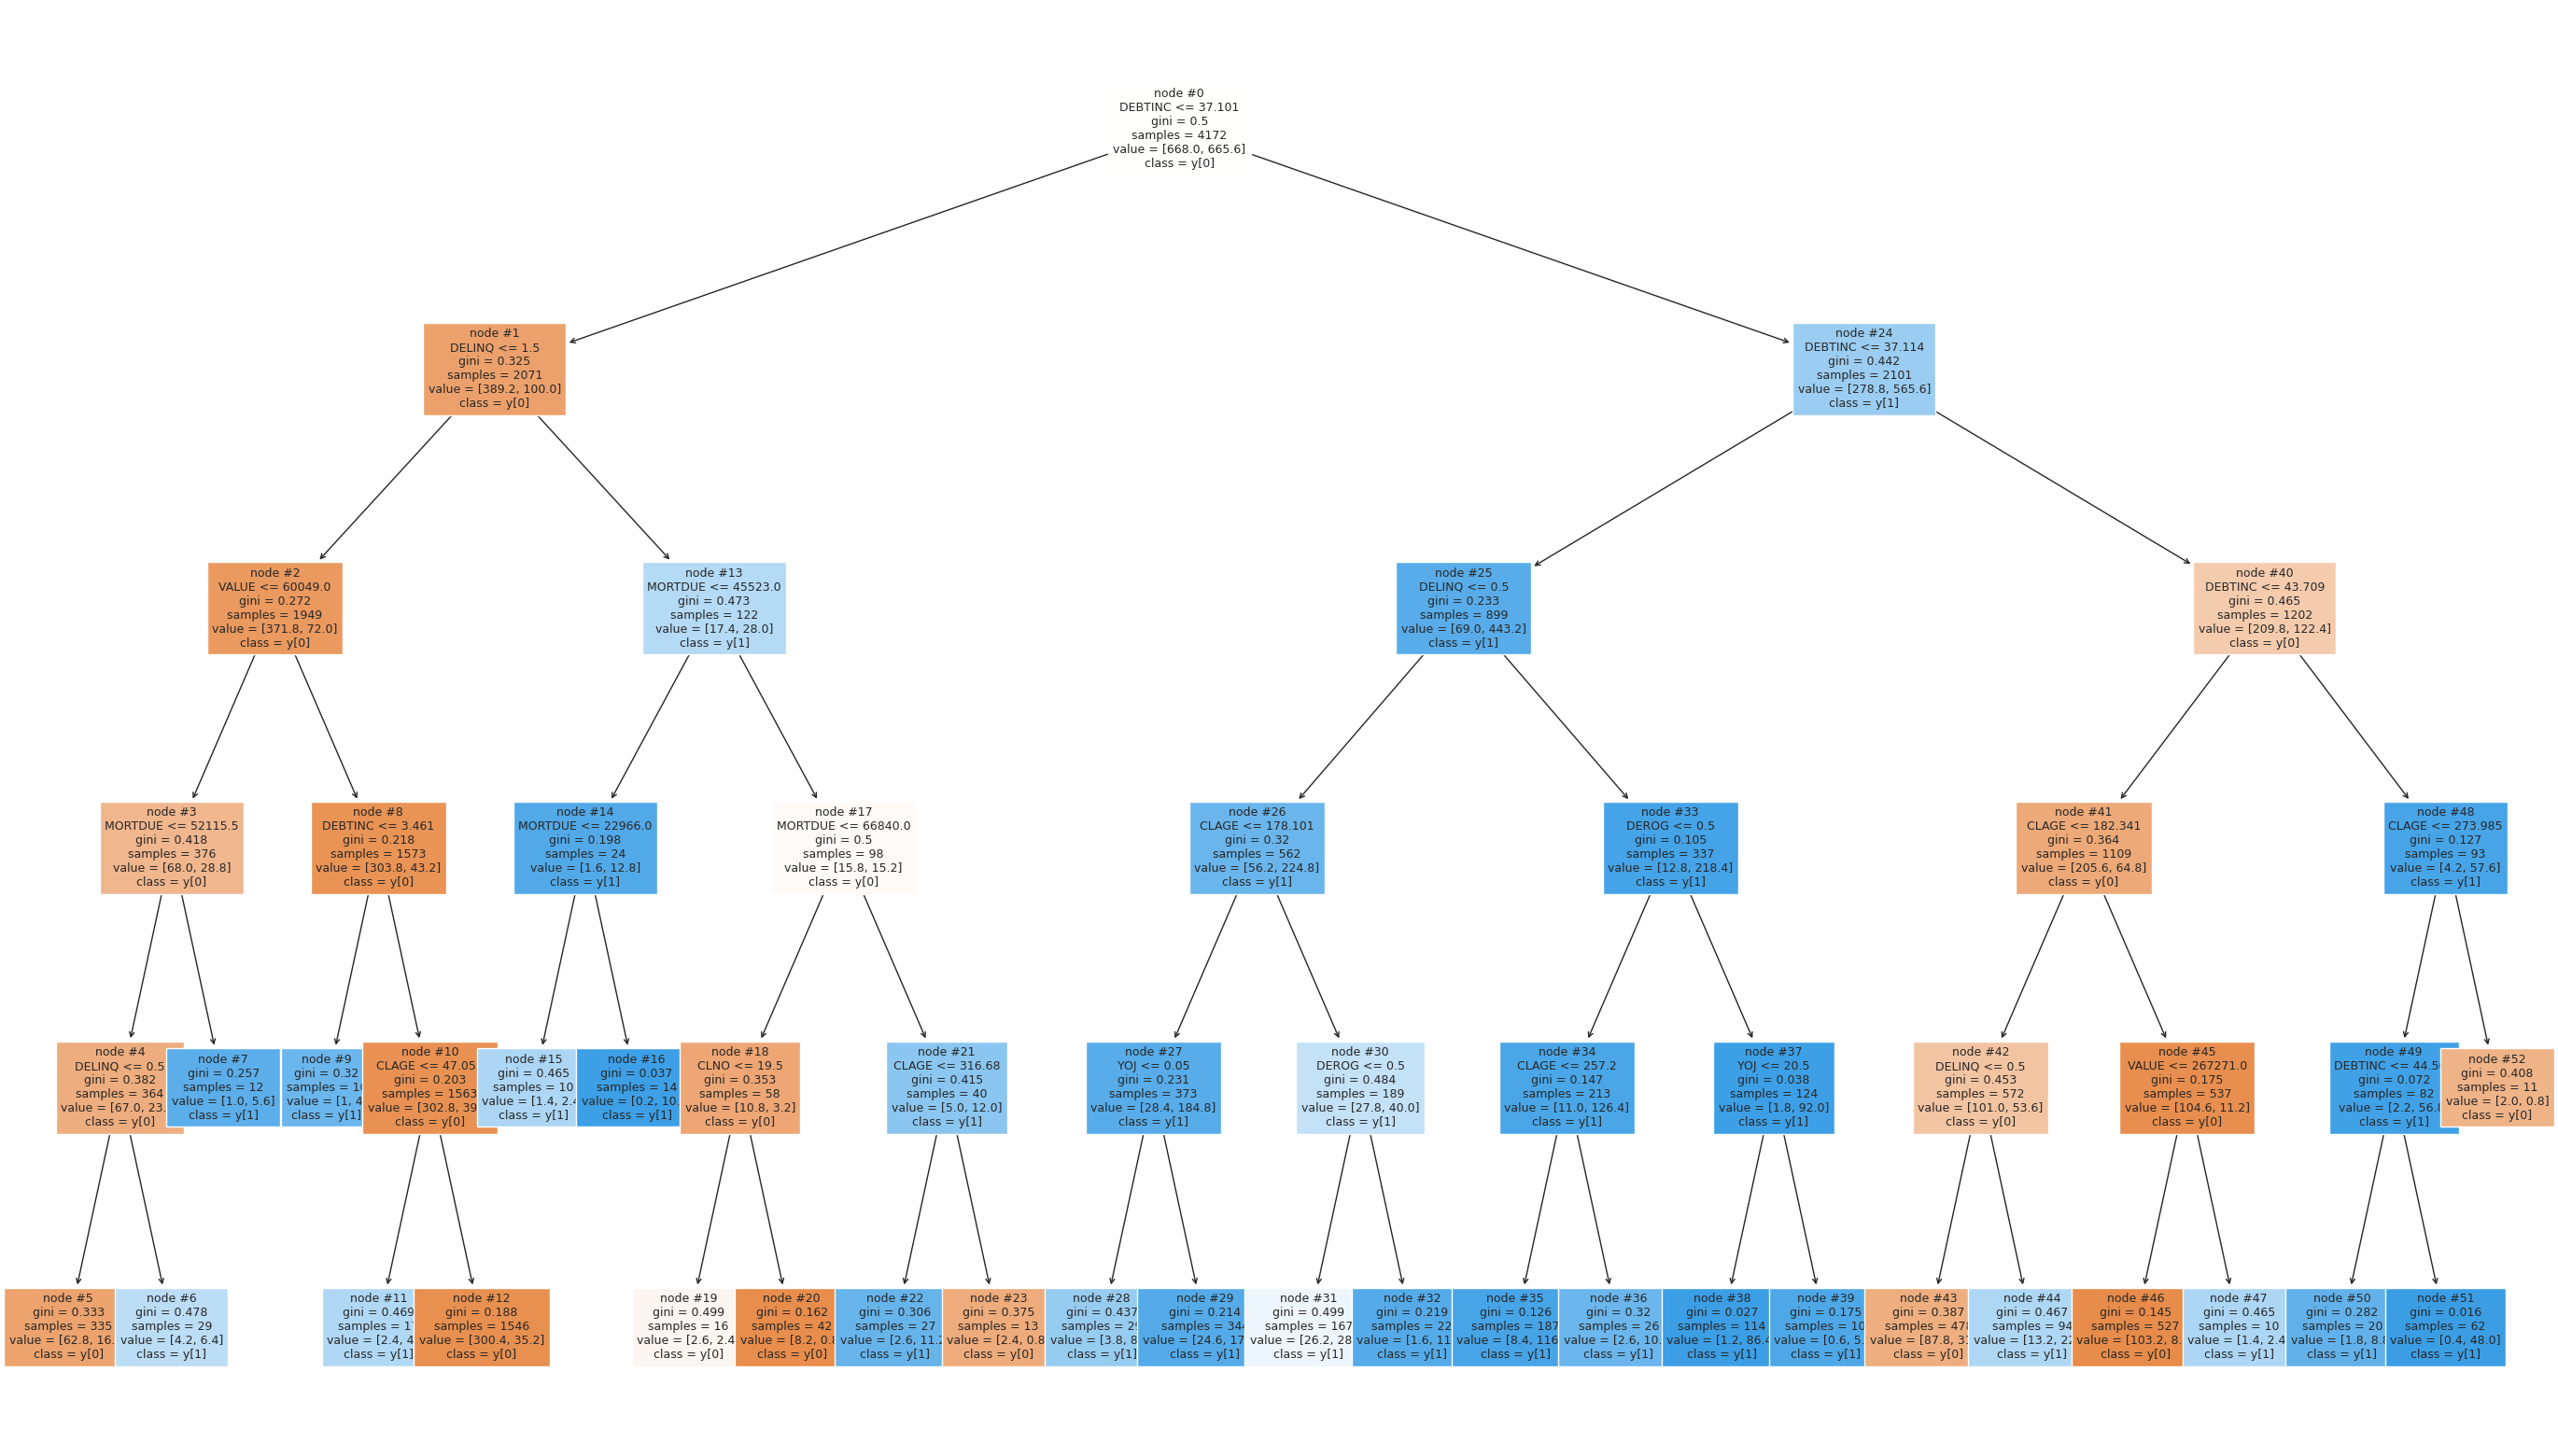

In [79]:
features = list(X.columns)

plt.figure(figsize = (35, 20))

tree.plot_tree(dtree_estimator, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)

plt.show()


**Observations:** Based on the illustration individuals who have a Debt to income ratio of 37.101 or less, 1 deliquent credit line or less, a loan greater then 12,400 or a debt to income ratio greater then 12.4 are likely to not default.

Individuals with 1 or more deliquent credit lines and derogatory reports seems to be most likely to default.


Note: Blue leaves represent the individuals who defaulted, i.e., y[1], while the orange leaves represent the individuals who did not default, i.e., y[0]. Also, the more the number of observations in a leaf, the darker its color gets.

### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction.

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [80]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = {0: 0.20, 1: 0.80}, random_state = 1)

rf_estimator.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



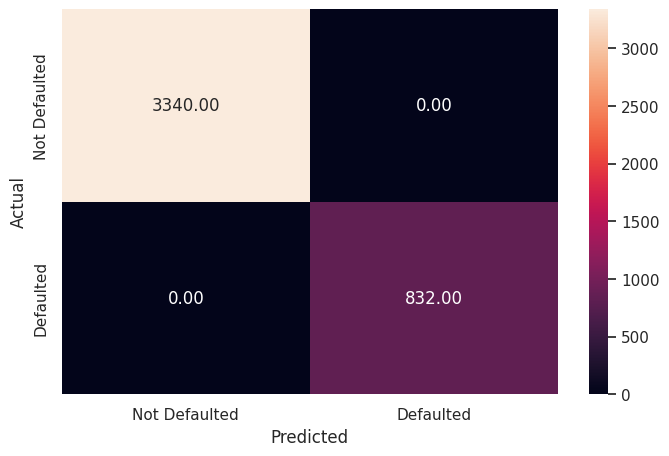

In [81]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(x_train)

metrics_score(y_train, y_pred_train_rf)

**Observation:**

Similarly to the first decsion tree The Random Forest is giving a 100% score for all metrics on the training dataset.

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1431
           1       0.86      0.60      0.70       357

    accuracy                           0.90      1788
   macro avg       0.88      0.79      0.82      1788
weighted avg       0.90      0.90      0.89      1788



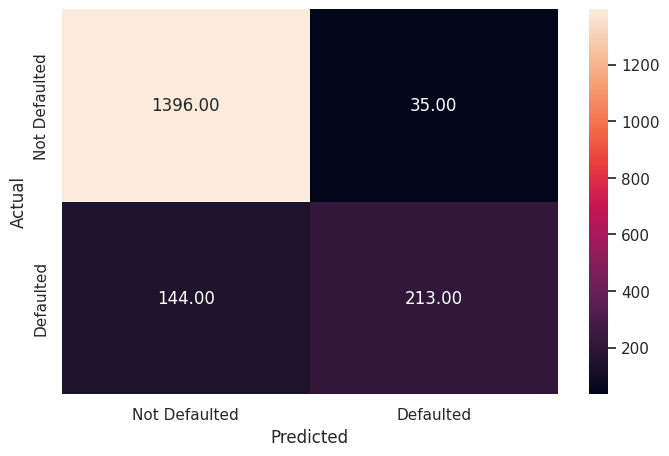

In [82]:
y_pred_test_rf = rf_estimator.predict(x_test)

metrics_score(y_test, y_pred_test_rf)

In [83]:
rf_estimator_test = model_performance_classification(rf_estimator,x_test,y_test)
rf_estimator_test

,Precision,Recall,Accuracy
0,0.88268,0.78609,0.89989


**Observations:** This model has achieved the highest overall accuracy thus far at 90%. However, compared to the tuned decision tree the class 1 recall has gone down from 79% to 60% but our precision has gone up to 86%. Lets see if by hypertuning the recall value can get better.

### **Random Forest Classifier Hyperparameter Tuning**

In [84]:
# Choose the type of classifier This takes about 28 min to run
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 1)

# Grid of parameters to choose from
params_rf = {"n_estimators": [100, 150, 200],
    "max_depth": [3, 4, 5, 6],
    "min_samples_leaf": [5, 10, 20, 50],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": ["balanced",{0: 0.2, 1: 0.8}]
             }


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_
rf_estimator_tuned.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, criterion='entropy',
                       max_depth=6, max_features=0.9, max_samples=0.9,
                       min_samples_leaf=50, random_state=1)

**Observations:** From the grid search function it can be seen that the optimized parameters are a max depth of 6, max features of 0.9, max samples of 0.9, min sample leaf of 50, and to weight the classes.

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      3340
           1       0.60      0.82      0.69       832

    accuracy                           0.85      4172
   macro avg       0.77      0.84      0.80      4172
weighted avg       0.88      0.85      0.86      4172



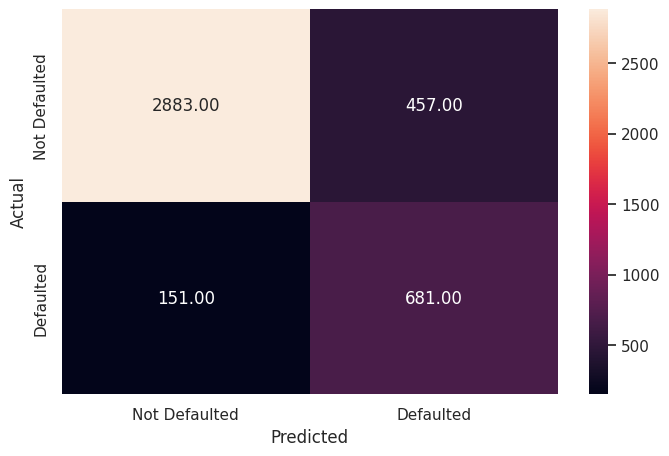

In [85]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(x_train)

metrics_score(y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.94      0.87      0.90      1431
           1       0.59      0.77      0.67       357

    accuracy                           0.85      1788
   macro avg       0.77      0.82      0.79      1788
weighted avg       0.87      0.85      0.86      1788



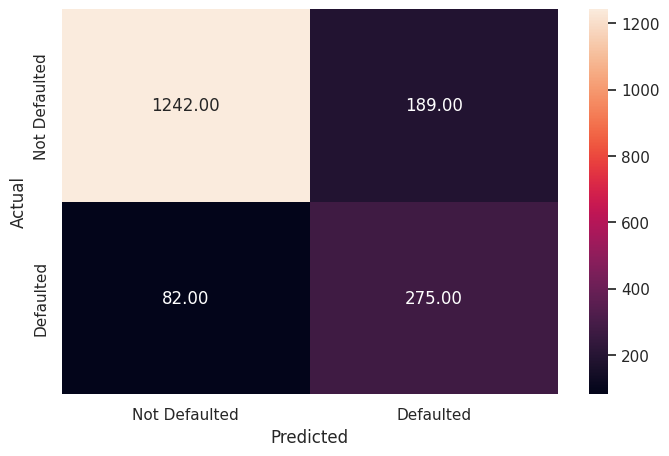

In [86]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(x_test)

metrics_score(y_test, y_pred_test_rf_tuned)

In [87]:
rf_estimator_tuned_test = model_performance_classification(rf_estimator_tuned,x_test,y_test)
rf_estimator_tuned_test

,Precision,Recall,Accuracy
0,0.76537,0.81912,0.84843


**Observations:** Compared to the untuned random forest the accuracy has decreased to 84% however the recall for class 1 has increased to 77%. Our overall precision has decreased to 77% from 87%.

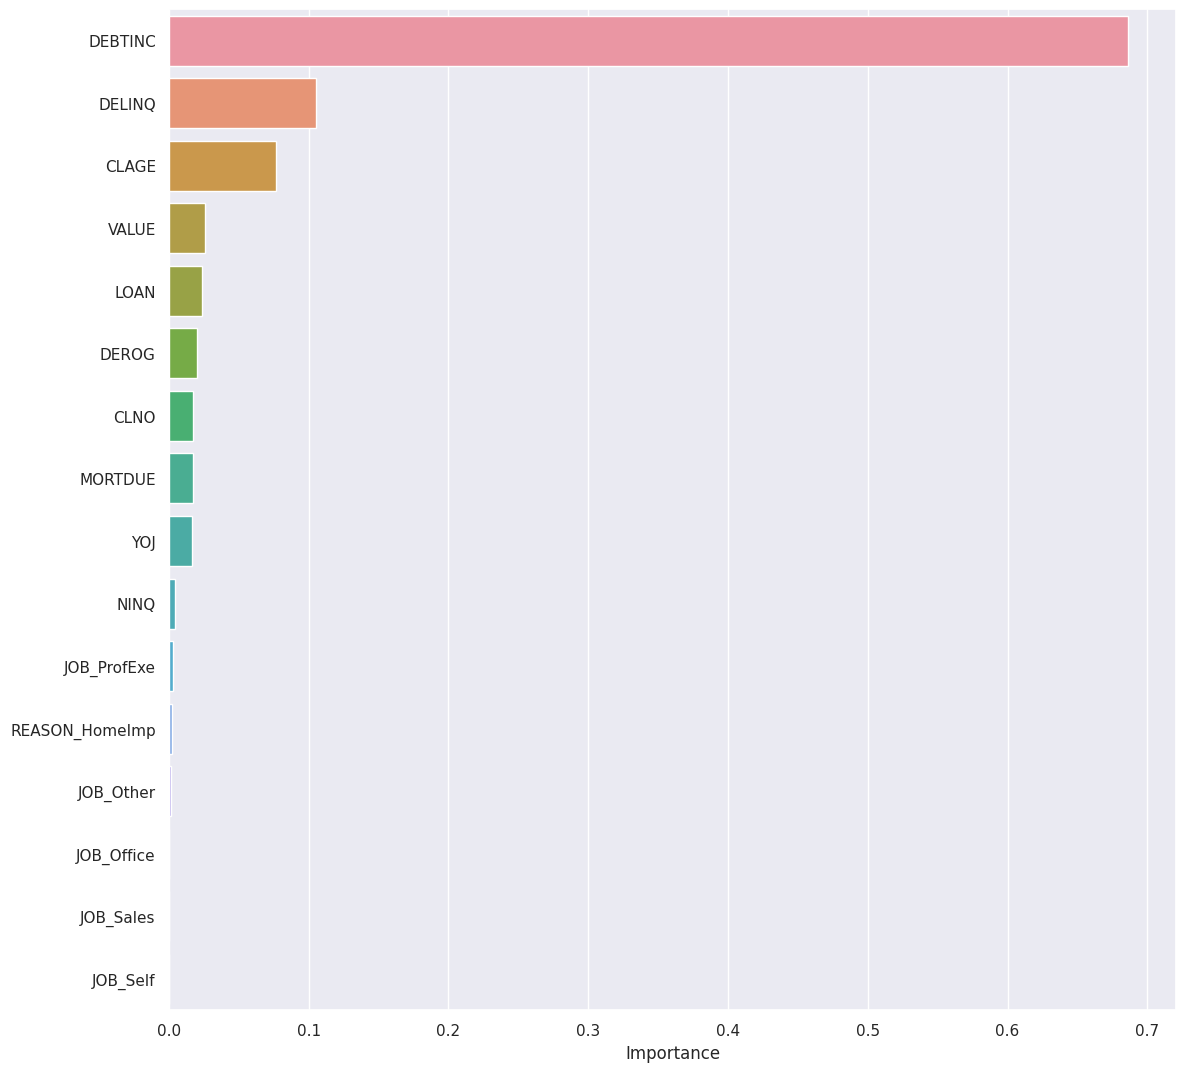

In [88]:
# Plotting feature importance
importances = rf_estimator_tuned.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x=importance_df.Importance, y=importance_df.index);

**Observations:** Similar to the decision tree debt to income ratio is the most important feature by a significant margin.

Comparing the performance of all models

In [89]:
models_test_comp_df = pd.concat(

    [
    lg_model_Test.T,d_tree_test.T,dtree_estimator_test.T,rf_estimator_test.T,
    rf_estimator_tuned_test.T
    ],

    axis = 1,
)

models_test_comp_df.columns = [

 "Logisitic Regression Classifier",
    "Decision Tree classifier",
    "Tuned Decision Tree classifier",
    "Random Forest classifier",
    "Tuned Random Forest classifier"

]

In [90]:
print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Logisitic Regression Classifier,Decision Tree classifier,Tuned Decision Tree classifier,Random Forest classifier,Tuned Random Forest classifier
Precision,0.58465,0.80783,0.74827,0.88268,0.76537
Recall,0.63210,0.76827,0.81144,0.78609,0.81912
Accuracy,0.59955,0.87136,0.83277,0.89989,0.84843


**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):**

*   Based on the table above it can be seen that the default random forest model had the highest accuracy while the logistic regression model had the lowest. Digging deeper we can see that the tuned random forest model has the highest overal recall. The tuned decision tree had the best class 1 recall of 78% while the tuned random forest had a class 1 recall of 77%. That being said I would use the tuned random forest model as the one to use in order to predict if someone will default on their loan or not as it has the second highest class 1 recall of 77% while still maintaining good overall accuracy of 85%. The decision trees also can be used to interpret the outcome of the model by visualizing the breakdown of how the decision was made. This could help the bank find reasons as to why someone might default.

**2. Refined insights:**
- Since debt to income ratio is the most important feature when determining if someone is going to default or not it does not help that almost a quarter of individuals are missing this value. For this model we used median to fill those missing values but that may not be a good representation of the data. Other important features were DELINQ and CLAGE that had 10% and 5% of their data missing respectiviley so filling those values as well could be valuable. Also, rouglhy 68% of the data set put their job as other. This doesn't really help us in grouping people based on their job. If future data is to be gathered perhaps adding more job categories would help refine the models or help find some correlation. Similar story could be said about REASON as well as there is only two options.

**3. Proposal for the final solution design:**
- The model I would propose to adopt is the tuned random forest model as the one to use in order to predict if someone will default on their loan or not as it has the second highest class 1 recall of 77% while still maintaining good overall accuracy of 85%. That being said you could utilize other models depending on the current circumstances. If the bank is in a position to take on more risk then utilizing the default random forest model may be better as its overall accuracy was the highest at 89% and was better at predicting people who would not default. Therefore you would capture more people as paying back the loan thus giving out more loans and making more money in interest. It would come at a cost of failing to identify the defaulters though.